In [56]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [57]:
pd.set_option("display.max_columns", None)
plt.style.use('seaborn-v0_8')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [58]:
data_path = r"C:\Users\HP\Desktop\Springboard\data.csv"

In [59]:
dataset = pd.read_csv(r"C:\Users\HP\Desktop\Internship\day.csv", encoding= 'unicode_escape')


## DATA INSPECTION

In [60]:
print(f' The shape of dataset is {(dataset.shape)} \n Total Rows are : {(dataset.shape)[0]}\n Total Columns are : {(dataset.shape)[1]}')

 The shape of dataset is (731, 16) 
 Total Rows are : 731
 Total Columns are : 16


In [61]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [62]:
dataset.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [64]:
dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [65]:
dataset.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [66]:
dataset.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,731.0,NaN,NaN,NaN,366.0,211.165812,1.0,183.5,366.0,548.5,731.0
dteday,731,731,2011-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,731.0,NaN,NaN,NaN,2.49658,1.110807,1.0,2.0,3.0,3.0,4.0
yr,731.0,NaN,NaN,NaN,0.500684,0.500342,0.0,0.0,1.0,1.0,1.0
mnth,731.0,NaN,NaN,NaN,6.519836,3.451913,1.0,4.0,7.0,10.0,12.0
holiday,731.0,NaN,NaN,NaN,0.028728,0.167155,0.0,0.0,0.0,0.0,1.0
weekday,731.0,NaN,NaN,NaN,2.997264,2.004787,0.0,1.0,3.0,5.0,6.0
workingday,731.0,NaN,NaN,NaN,0.683995,0.465233,0.0,0.0,1.0,1.0,1.0
weathersit,731.0,NaN,NaN,NaN,1.395349,0.544894,1.0,1.0,1.0,2.0,3.0
temp,731.0,NaN,NaN,NaN,0.495385,0.183051,0.05913,0.337083,0.498333,0.655417,0.861667


In [67]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [68]:
dataset['dteday'] = dataset['dteday'].astype('datetime64[ns]')

In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [70]:
dataset['Month'] = dataset['dteday'].dt.month

dataset['Day'] = dataset['dteday'].dt.day_name()    

In [71]:
dataset['Weekdays_or_weekend'] = dataset['dteday'].apply(lambda x: 1 if x=='Saturday' or x=='Sunday' else 0)

In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   instant              731 non-null    int64         
 1   dteday               731 non-null    datetime64[ns]
 2   season               731 non-null    int64         
 3   yr                   731 non-null    int64         
 4   mnth                 731 non-null    int64         
 5   holiday              731 non-null    int64         
 6   weekday              731 non-null    int64         
 7   workingday           731 non-null    int64         
 8   weathersit           731 non-null    int64         
 9   temp                 731 non-null    float64       
 10  atemp                731 non-null    float64       
 11  hum                  731 non-null    float64       
 12  windspeed            731 non-null    float64       
 13  casual               731 non-null  

In [73]:
dataset.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Month,Day,Weekdays_or_weekend
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,Saturday,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1,Sunday,0


In [74]:
dataset.drop(['dteday',"Day"],axis=1 ,inplace=True)

In [75]:
dataset.head(2)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Month,Weekdays_or_weekend
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,0
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1,0


In [76]:
dataset['season'].value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [77]:
dataset['holiday'].value_counts()

holiday
0    710
1     21
Name: count, dtype: int64

In [78]:
dataset['workingday'].value_counts()

workingday
1    500
0    231
Name: count, dtype: int64

In [79]:
dataset['Month'].value_counts()

Month
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     57
Name: count, dtype: int64

In [80]:
dataset['Weekdays_or_weekend'].value_counts()

Weekdays_or_weekend
0    731
Name: count, dtype: int64

In [81]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Month,Weekdays_or_weekend
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.0
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,6.519836,0.0
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,3.451913,0.0
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,1.000000,0.0
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,4.000000,0.0
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,7.000000,0.0
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,10.000000,0.0
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,12.000000,0.0


In [82]:
duplicates = dataset.duplicated().sum()
print(f"We have {duplicates} duplicate rows in our Bike Data.")

We have 0 duplicate rows in our Bike Data.


## Exploratory Data Analysis


In [83]:
numeric_features = dataset.describe().columns
numeric_features

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'Month', 'Weekdays_or_weekend'],
      dtype='object')

In [84]:
categorical_columns = list(set(dataset.columns) - set(numeric_features))
categorical_columns

[]

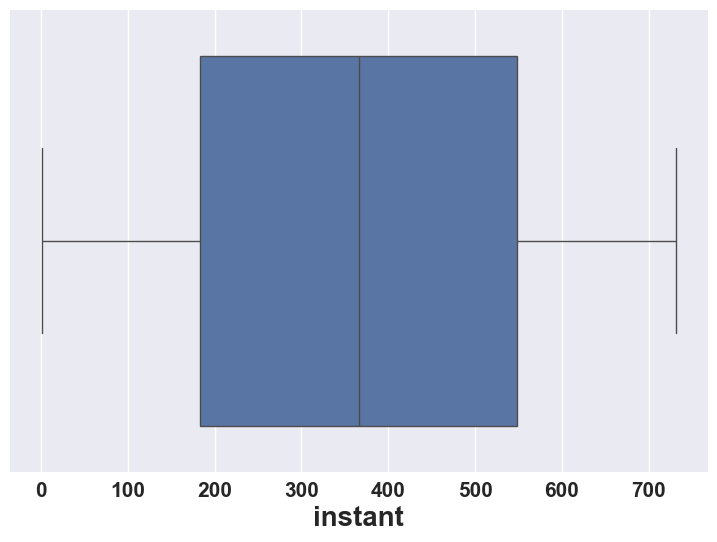

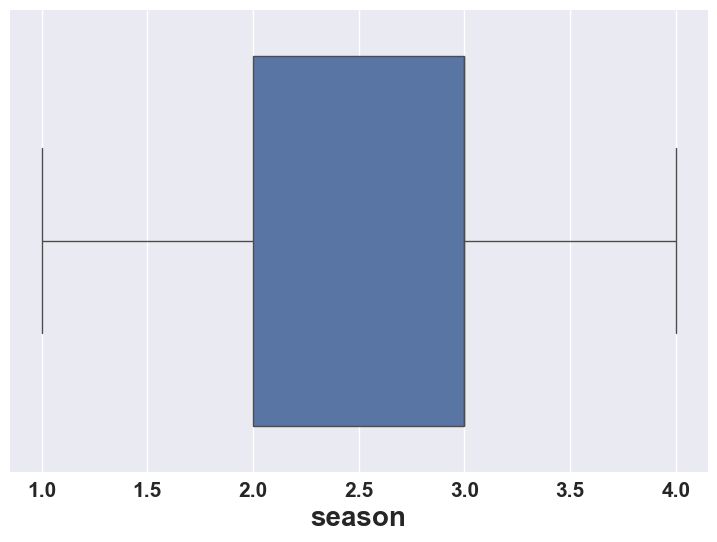

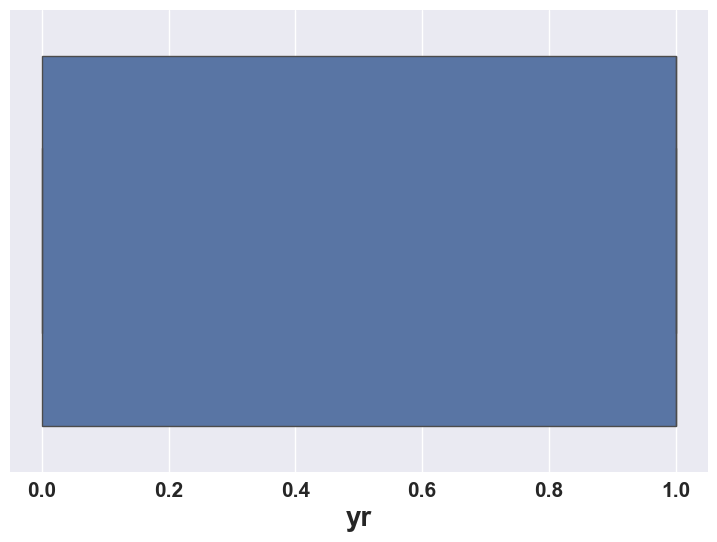

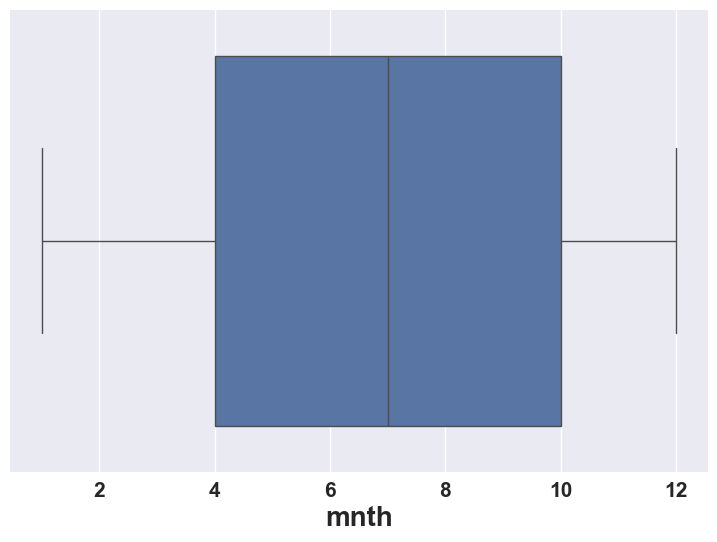

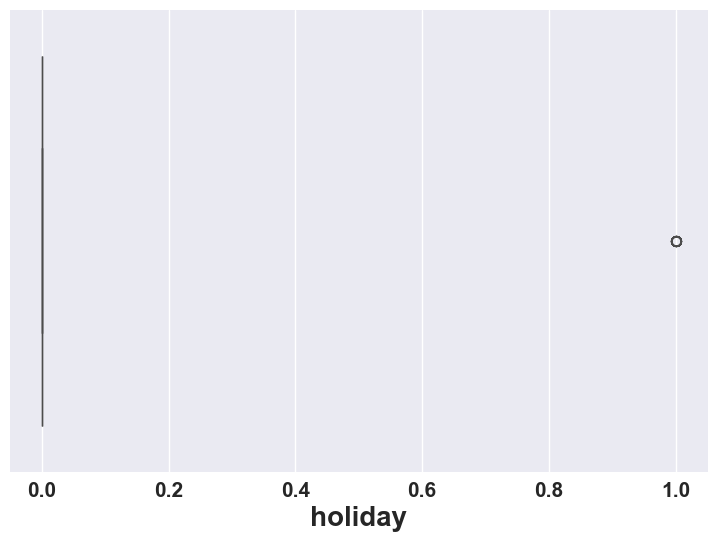

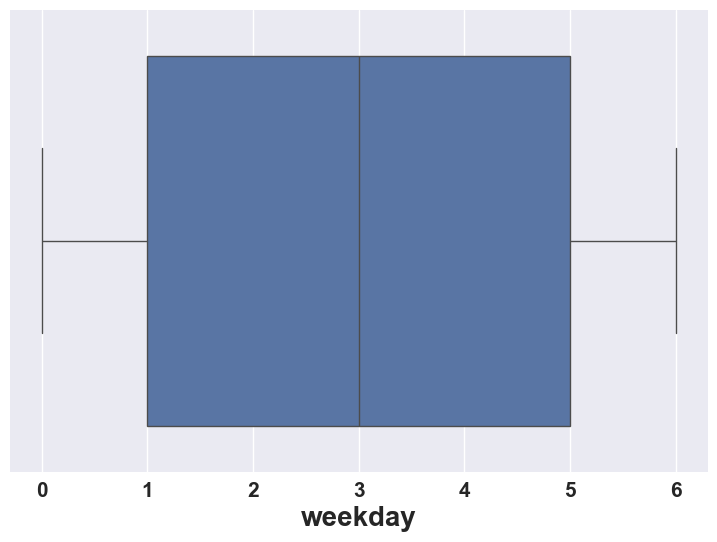

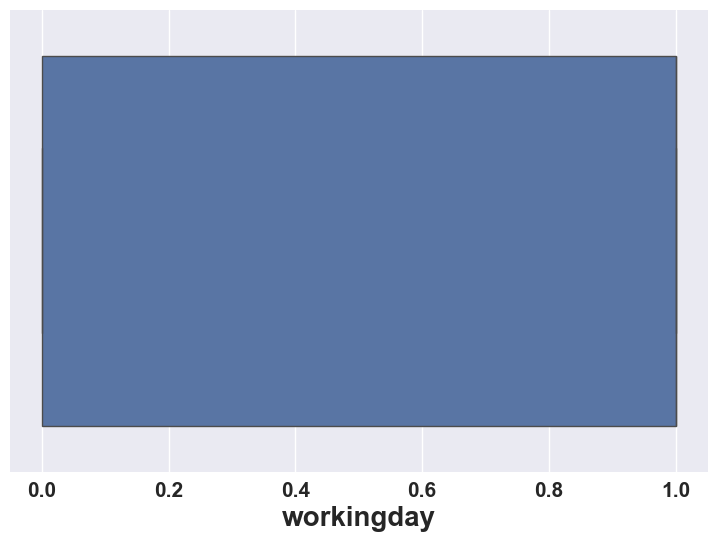

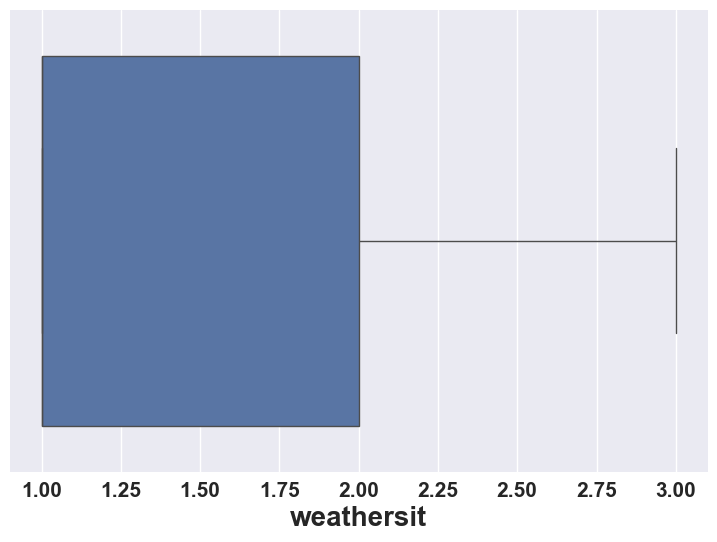

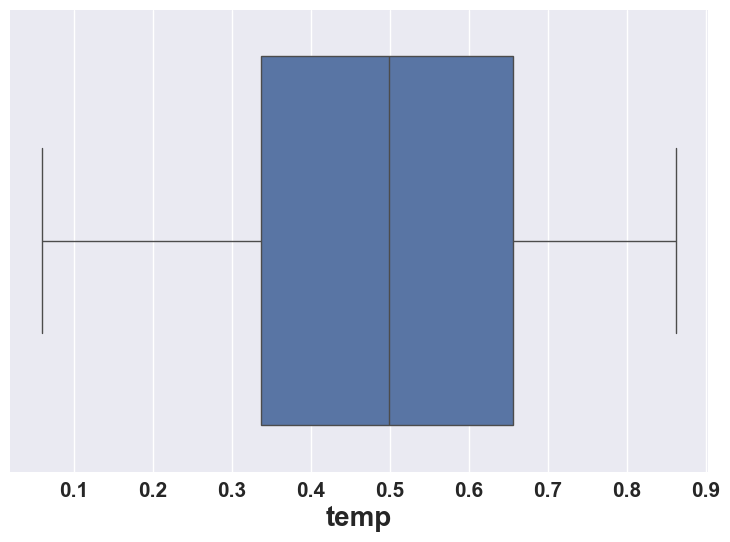

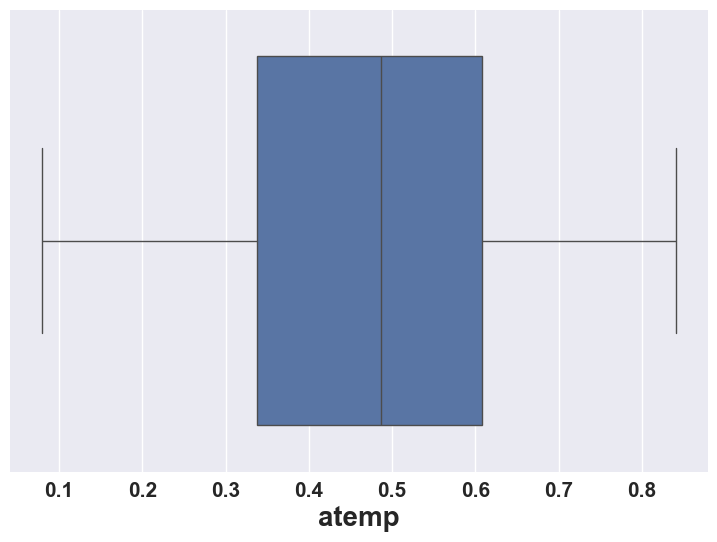

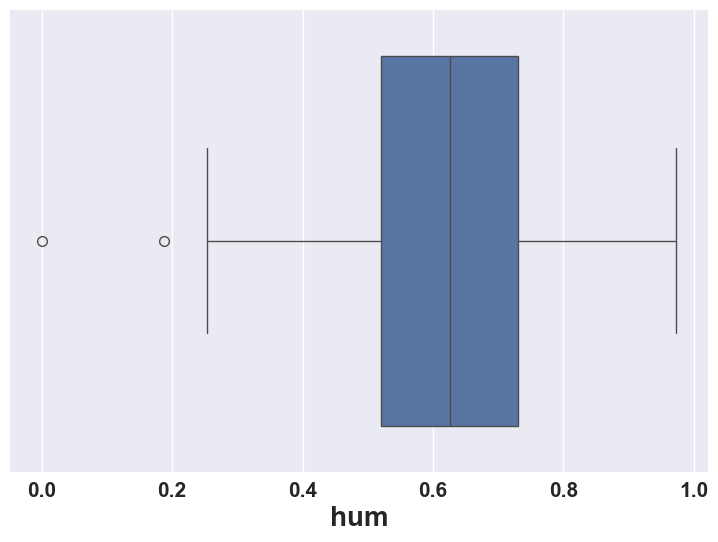

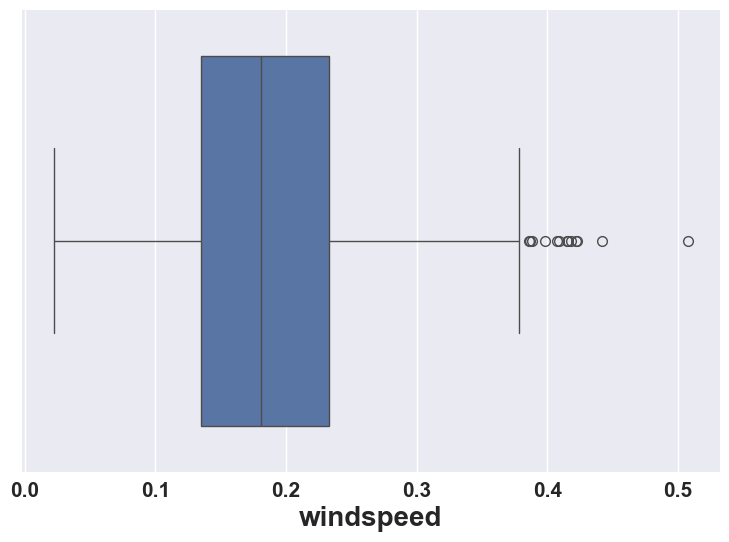

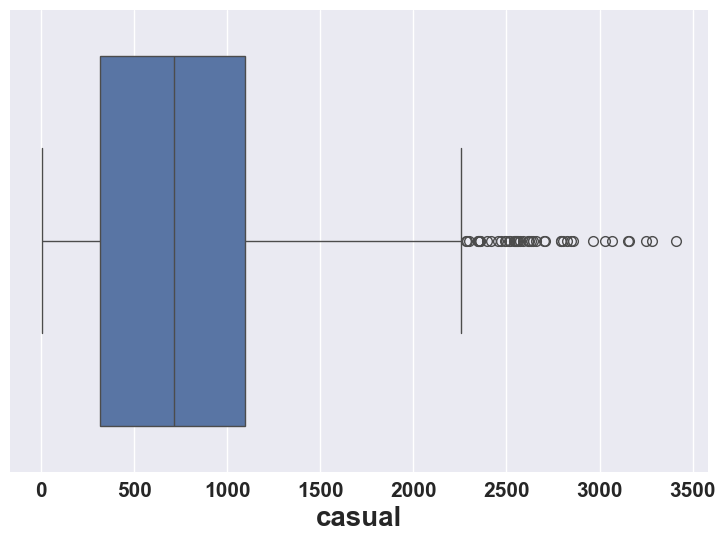

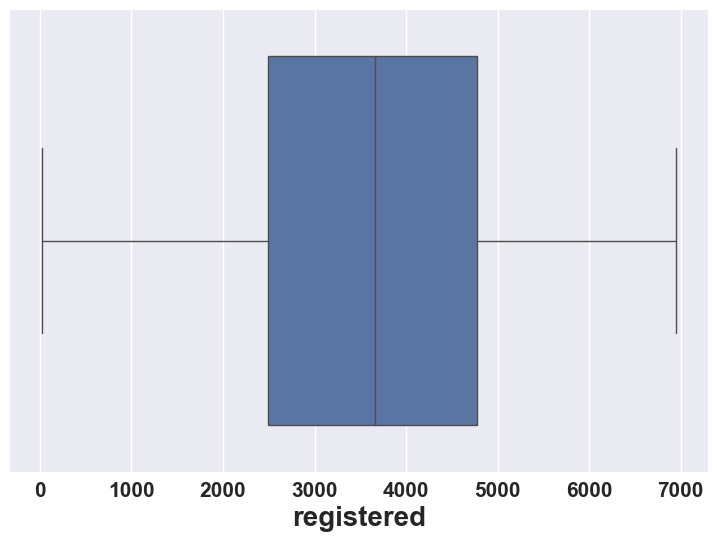

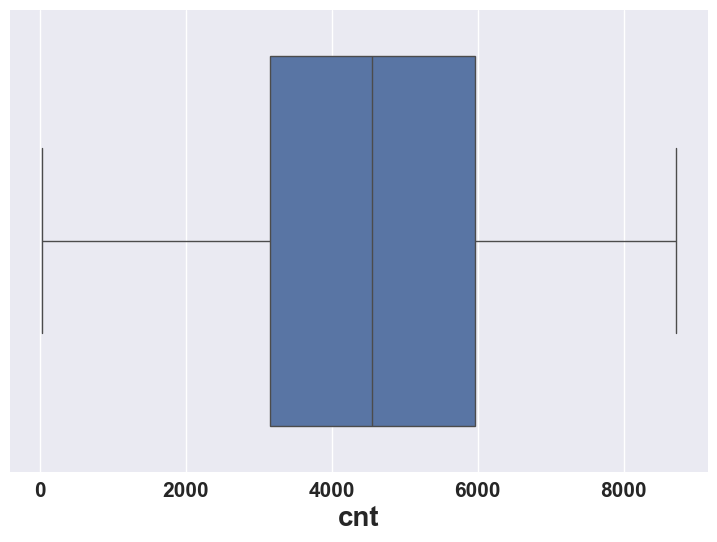

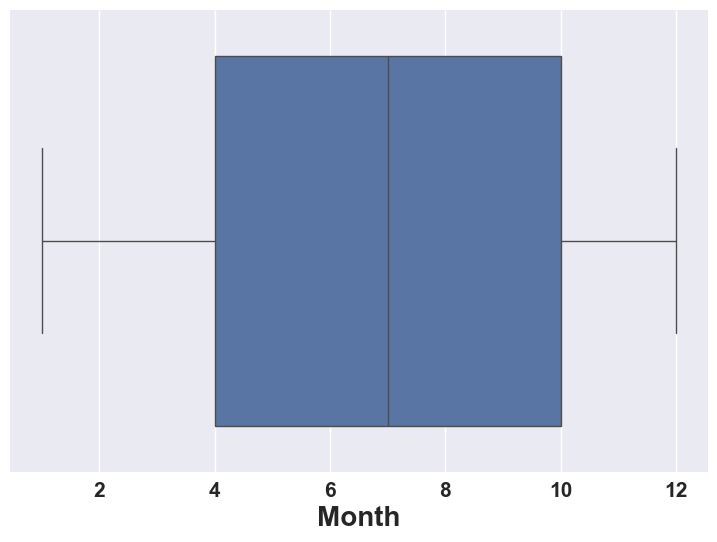

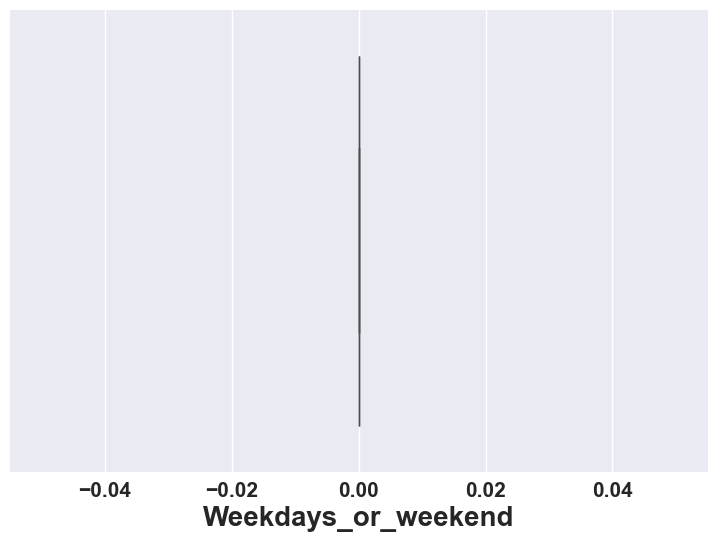

In [85]:
for col in numeric_features:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  sns.boxplot(x = dataset[col])

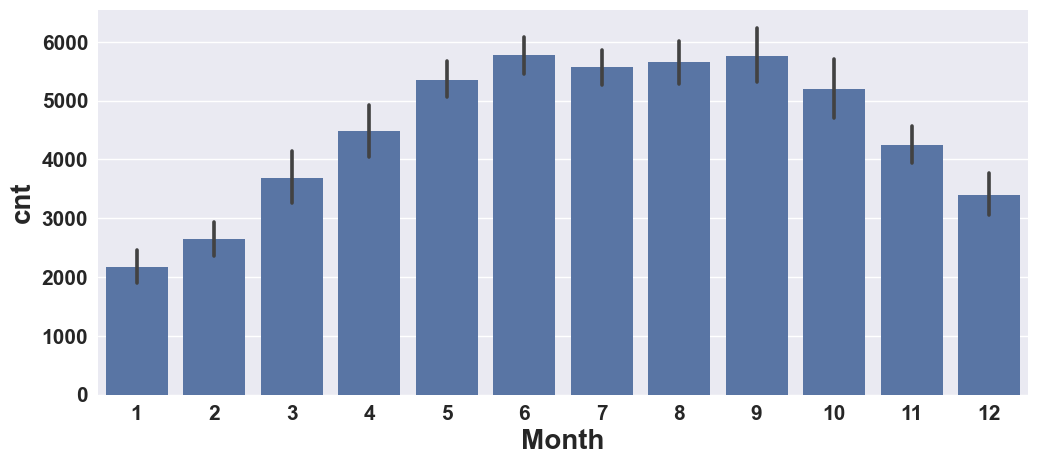

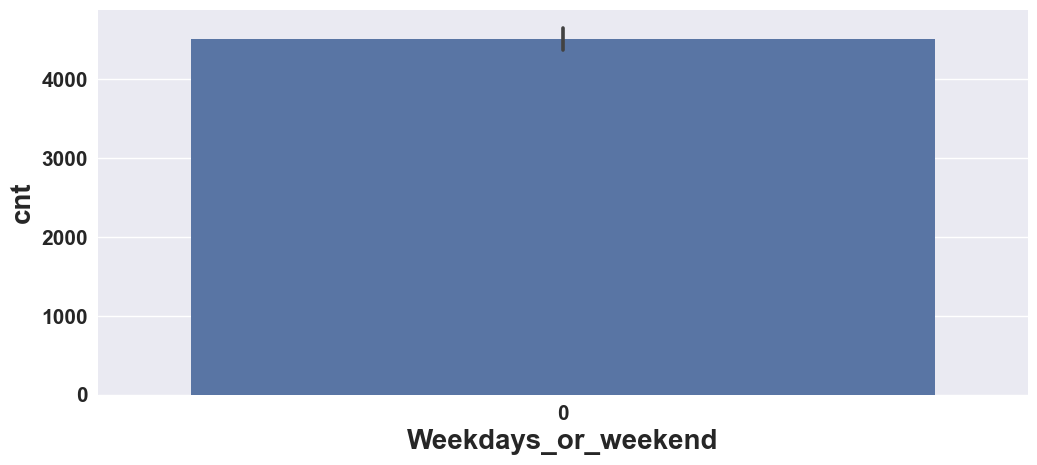

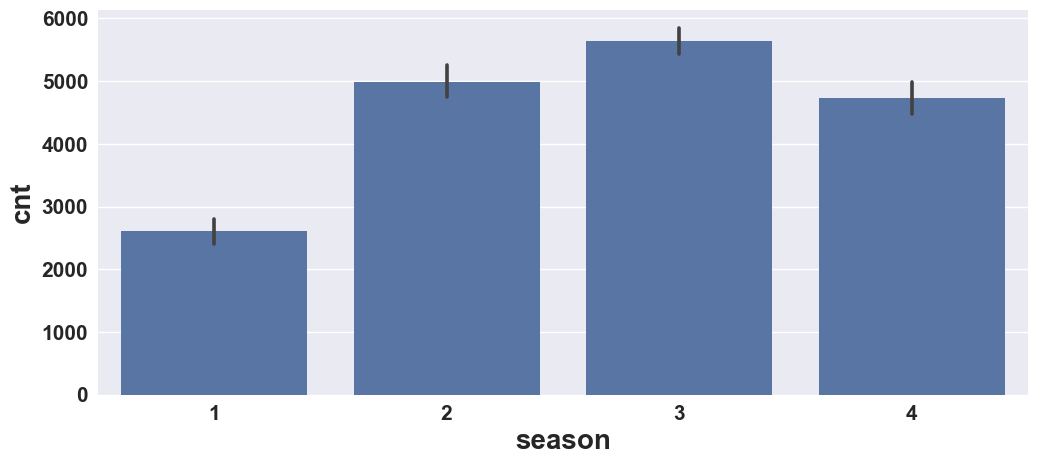

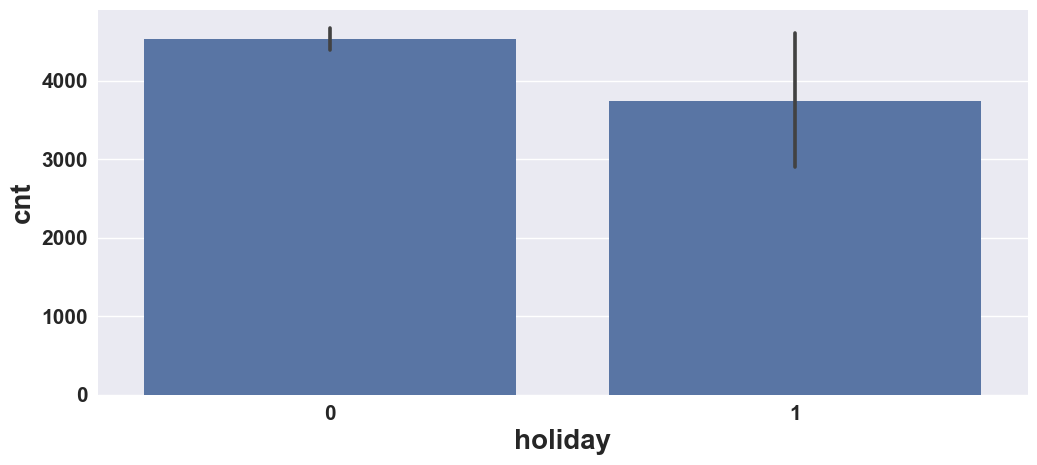

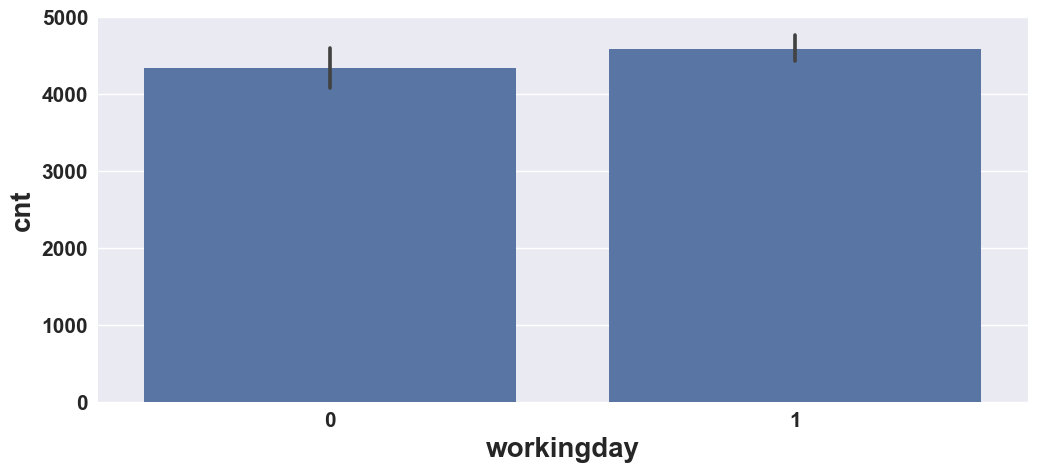

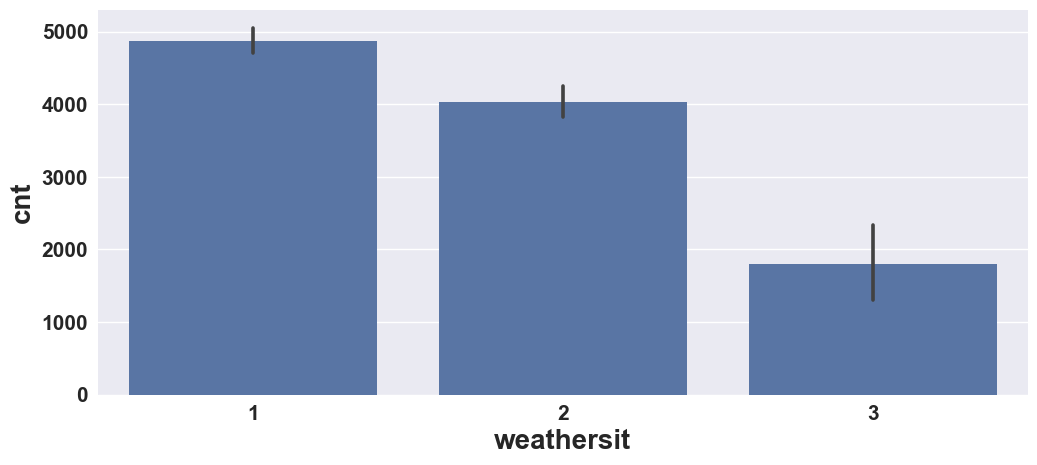

In [86]:
categorical_columns.extend(['Month','Weekdays_or_weekend','season','holiday','workingday', 'weathersit'])

for col in categorical_columns:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    sns.barplot(x = dataset[col],y = dataset['cnt'])

## Observations from Above Charts :-

## 1 . Fall season had the higest Bike Rent Count. People are more likely to rent bikes in Fall. Bike rentals in Spring is very less compared to other seasons.
## 2 . High number of bikes were rented on Holidays. 
## 3 . Most of the bikes were rented on Weekdays compared to weekends.
## 4 . From March Bike Rent Count started increasing and it was highest in June.

## Dependent Variable (Bike Rent Count) Vs Categorical Columns

Text(0.5, 1.0, 'Bike Rental Trend according to Day on Holiday / No Holiday')

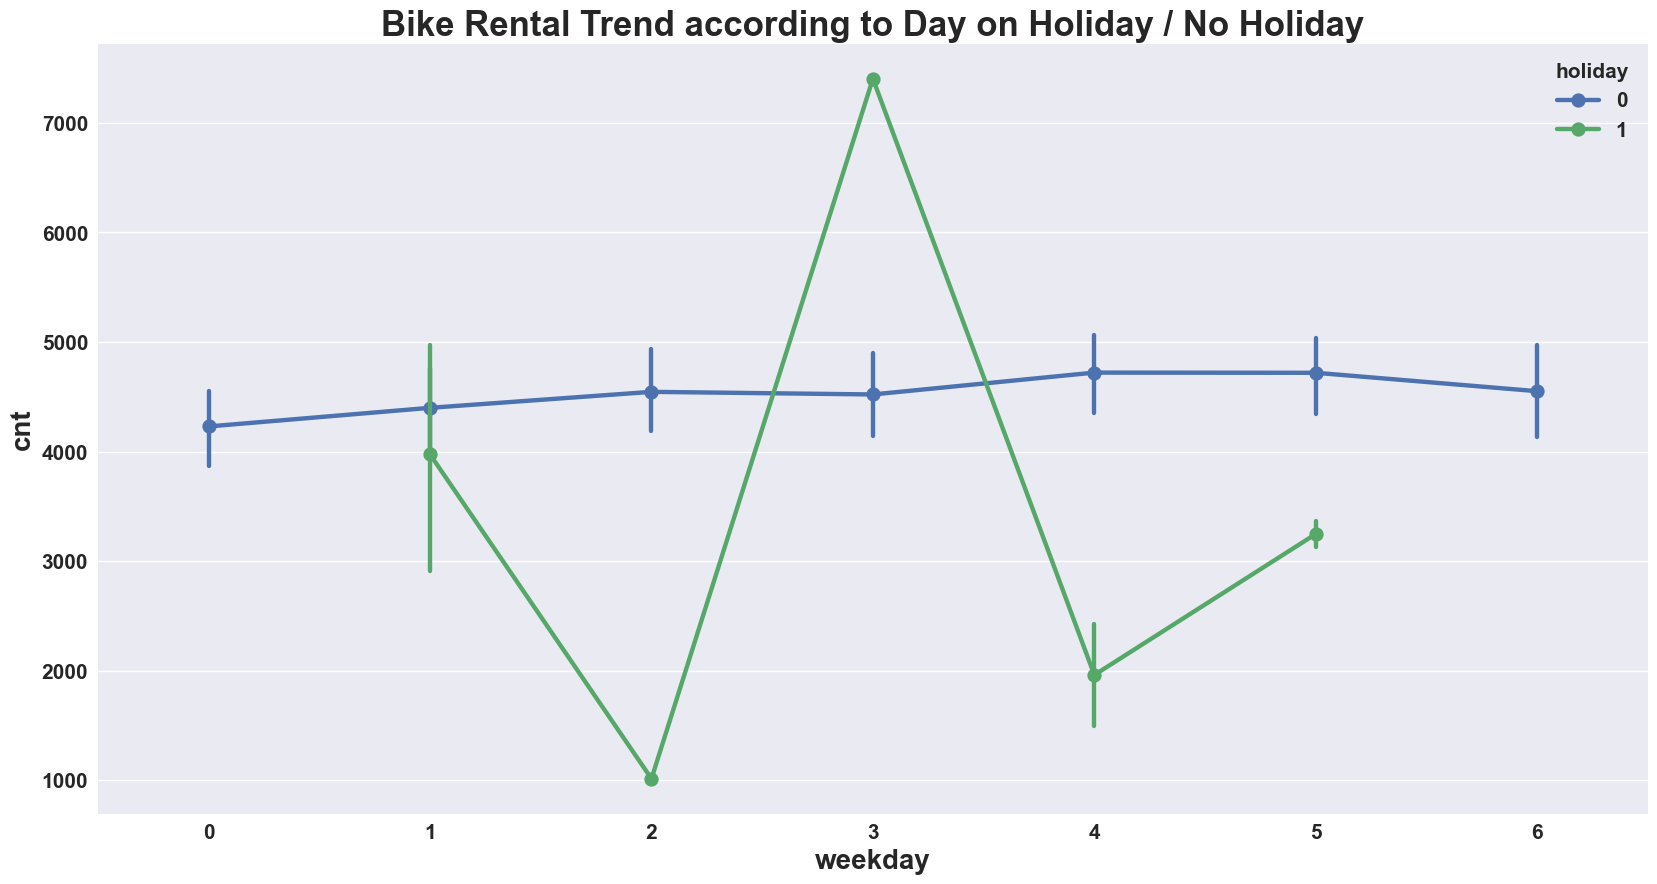

In [87]:
plt.figure(figsize=(20,10))
sns.pointplot(x = dataset['weekday'],y = dataset['cnt'],hue = dataset['holiday'])
plt.title("Bike Rental Trend according to Day on Holiday / No Holiday")

Text(0.5, 1.0, 'Bike Rental Trend according to day on Holiday / No Holiday')

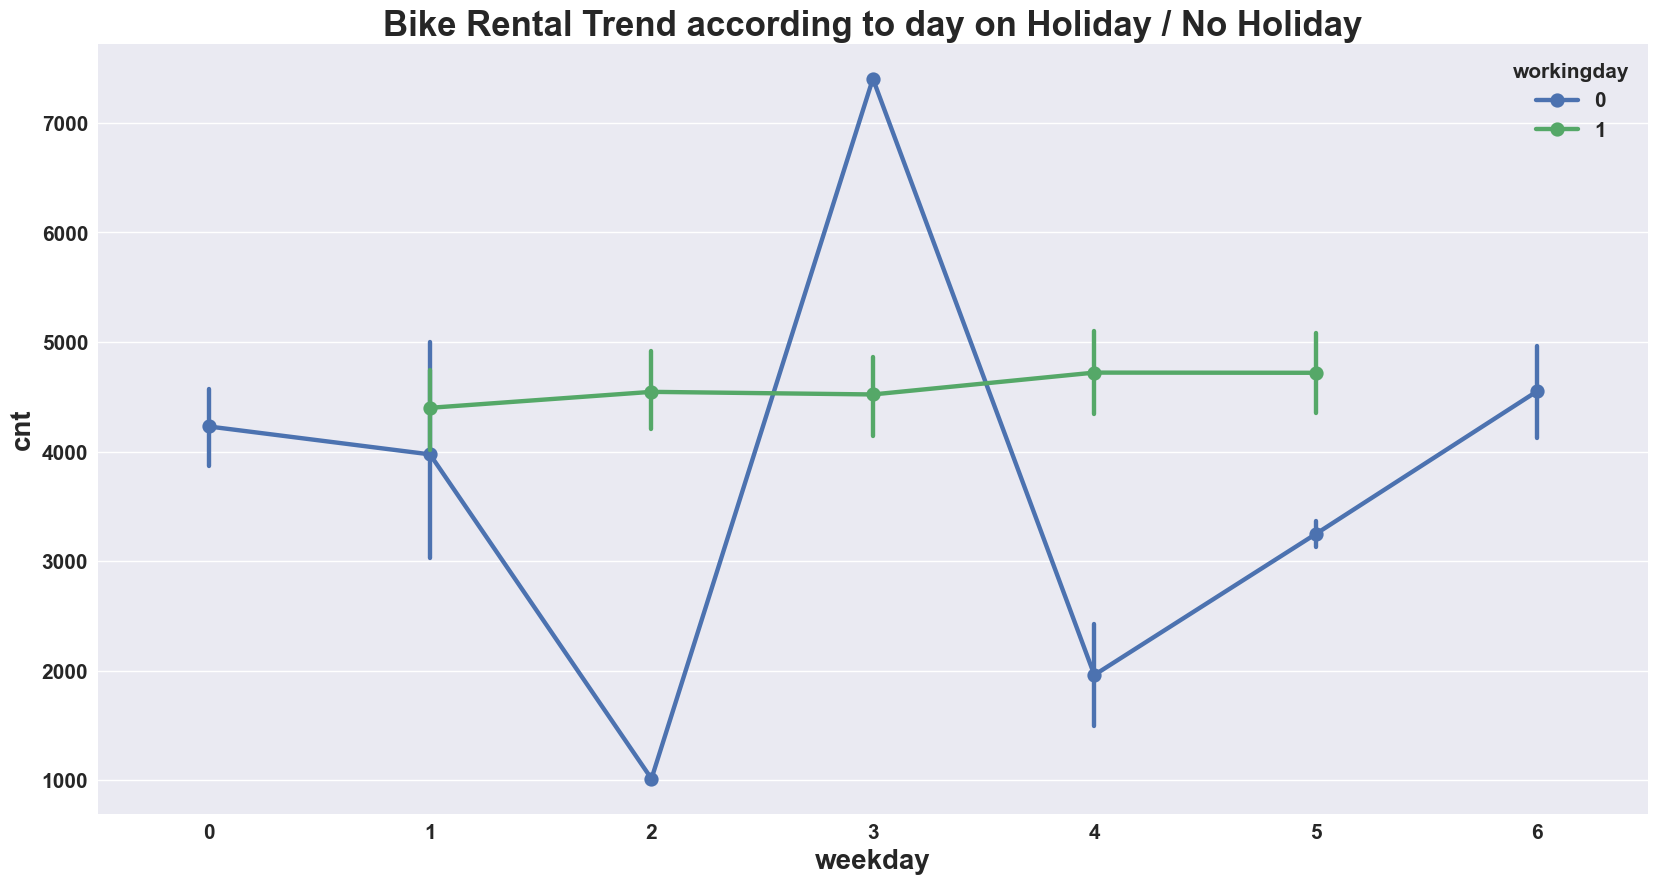

In [88]:
plt.figure(figsize=(20,10))
sns.pointplot(x = dataset['weekday'],y = dataset['cnt'],hue = dataset['workingday'])
plt.title("Bike Rental Trend according to day on Holiday / No Holiday")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Holiday / No Holiday')

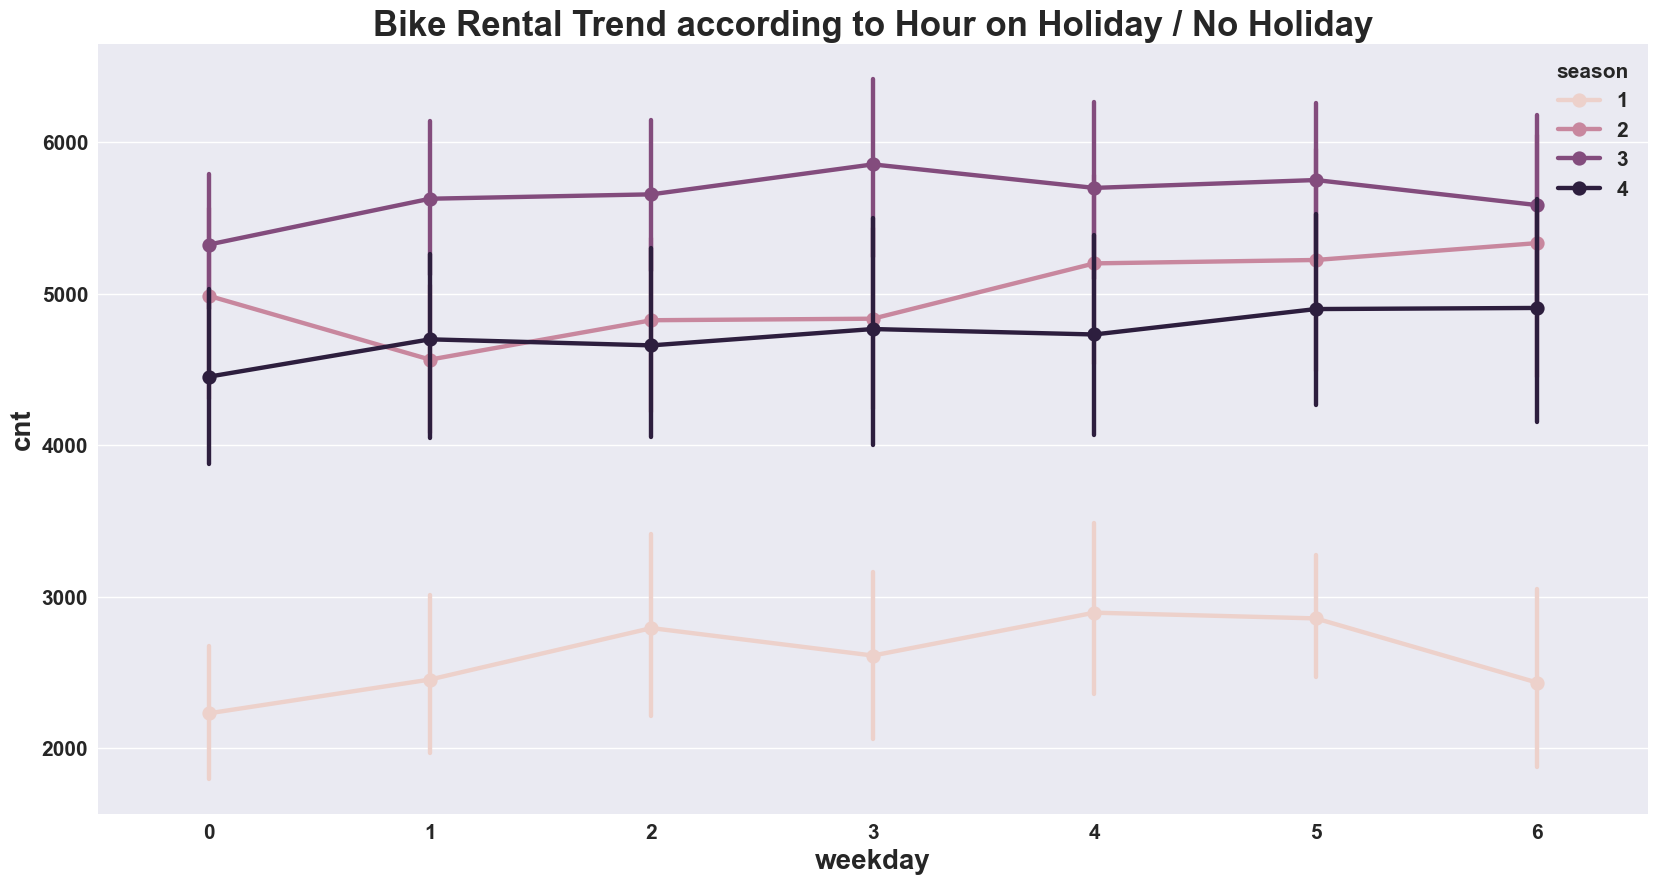

In [89]:
plt.figure(figsize=(20,10))
sns.pointplot(x = dataset['weekday'],y = dataset['cnt'],hue = dataset['season'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Holiday / No Holiday')

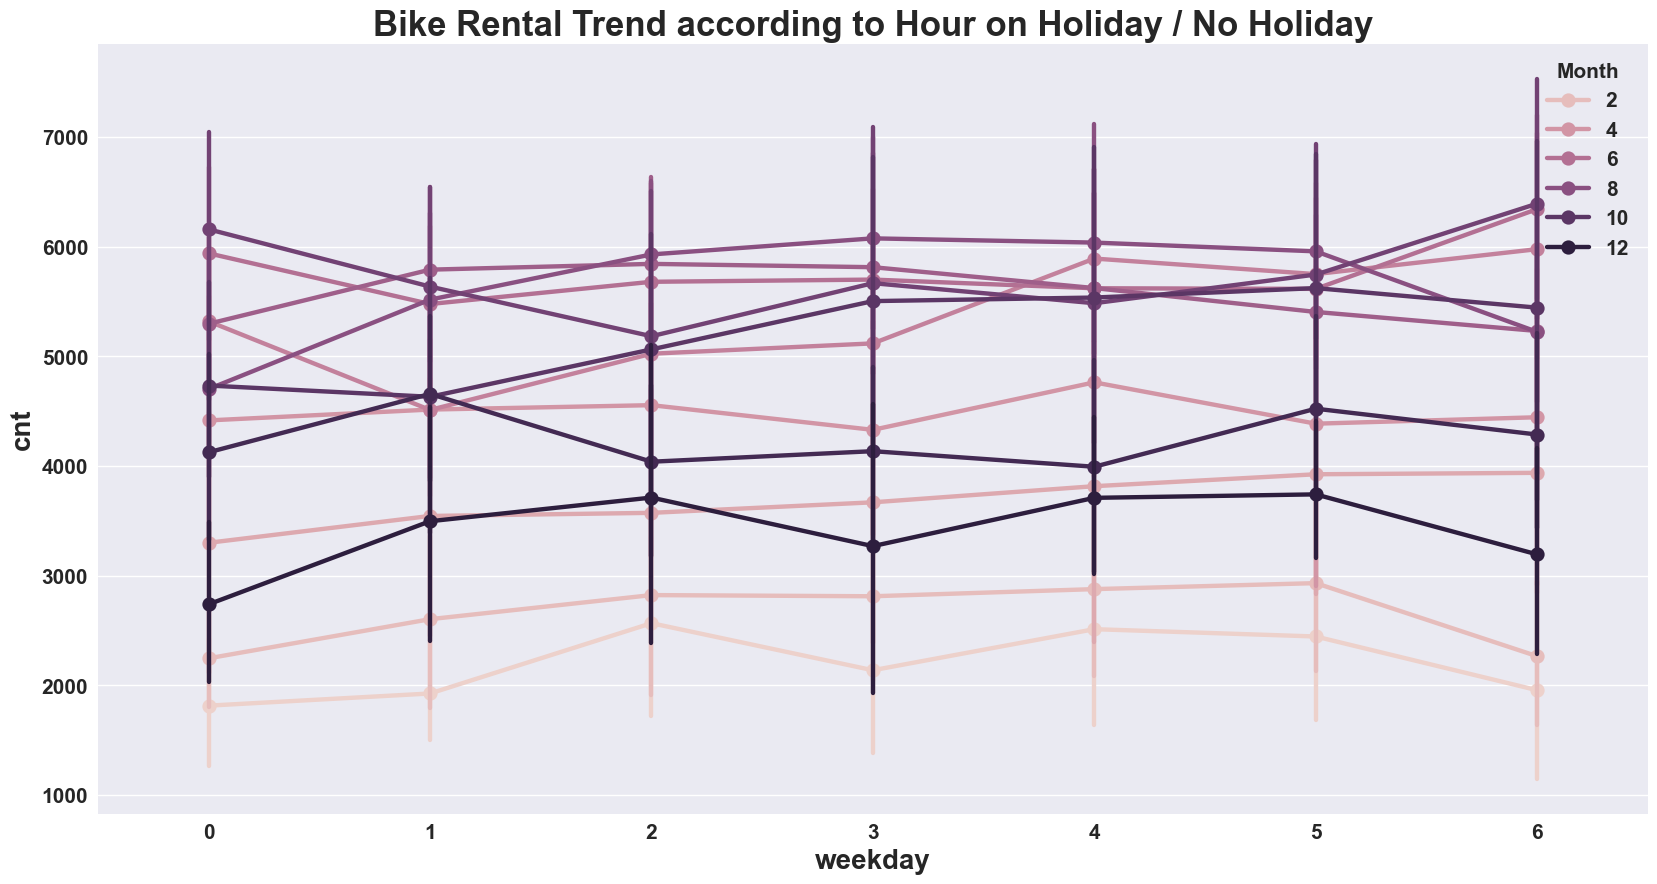

In [90]:
plt.figure(figsize=(20,10))
sns.pointplot(x = dataset['weekday'],y = dataset['cnt'],hue = dataset['Month'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")

Text(0.5, 1.0, 'Bike Rental Trend according to Hour on Holiday / No Holiday')

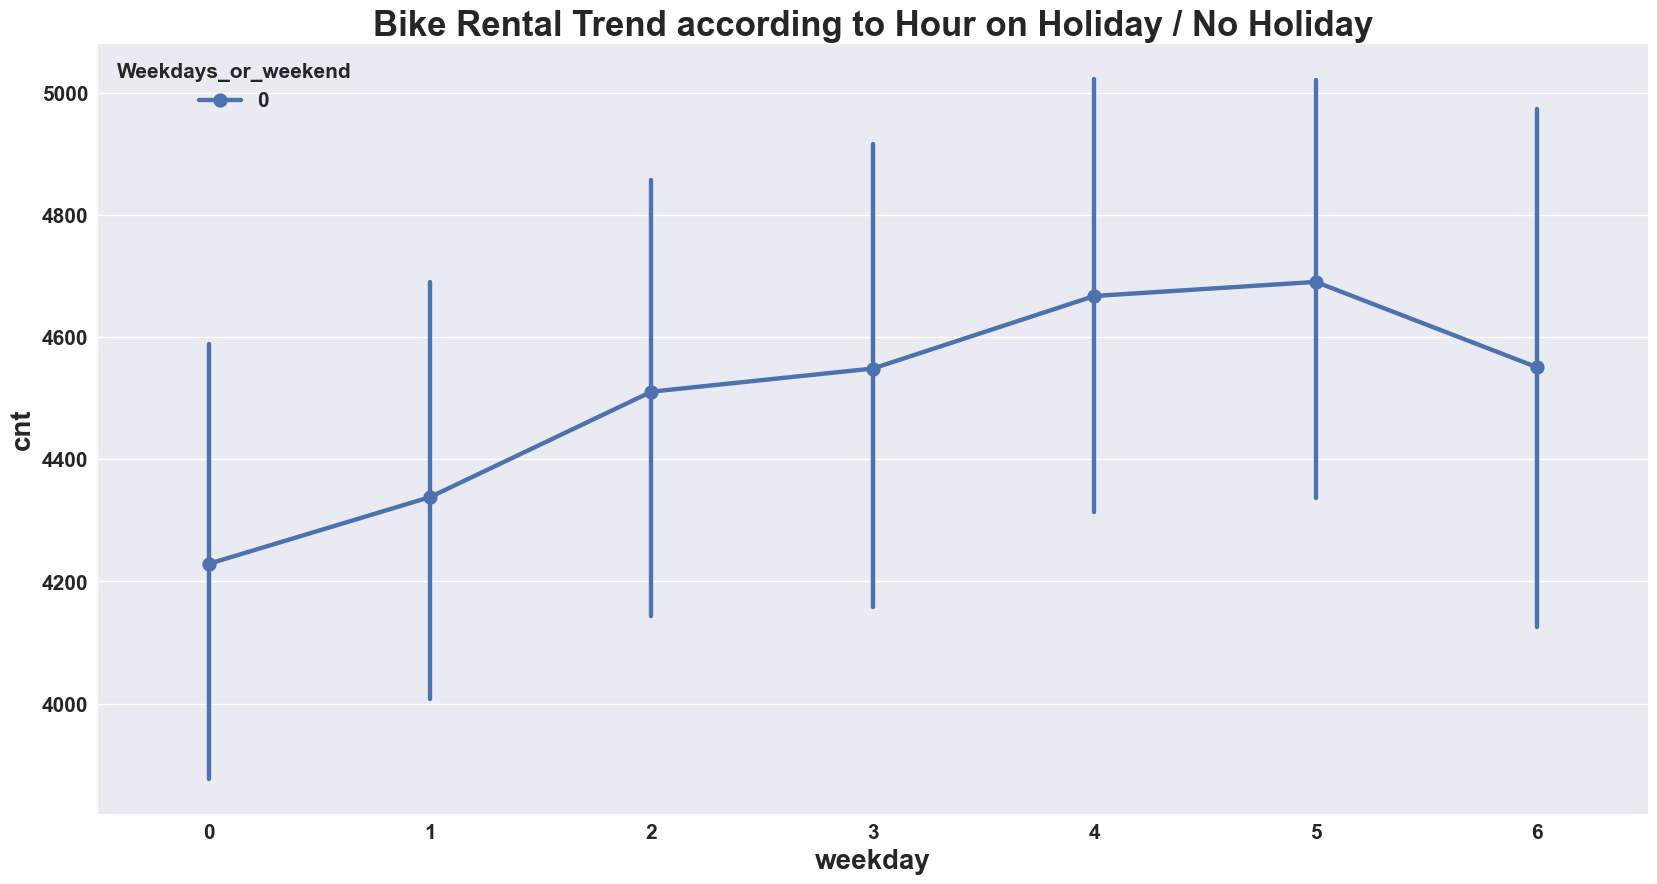

In [91]:
plt.figure(figsize=(20,10))
sns.pointplot(x = dataset['weekday'],y = dataset['cnt'],hue = dataset['Weekdays_or_weekend'])
plt.title("Bike Rental Trend according to Hour on Holiday / No Holiday")

## Distribution of Target Variable

<Axes: xlabel='cnt'>

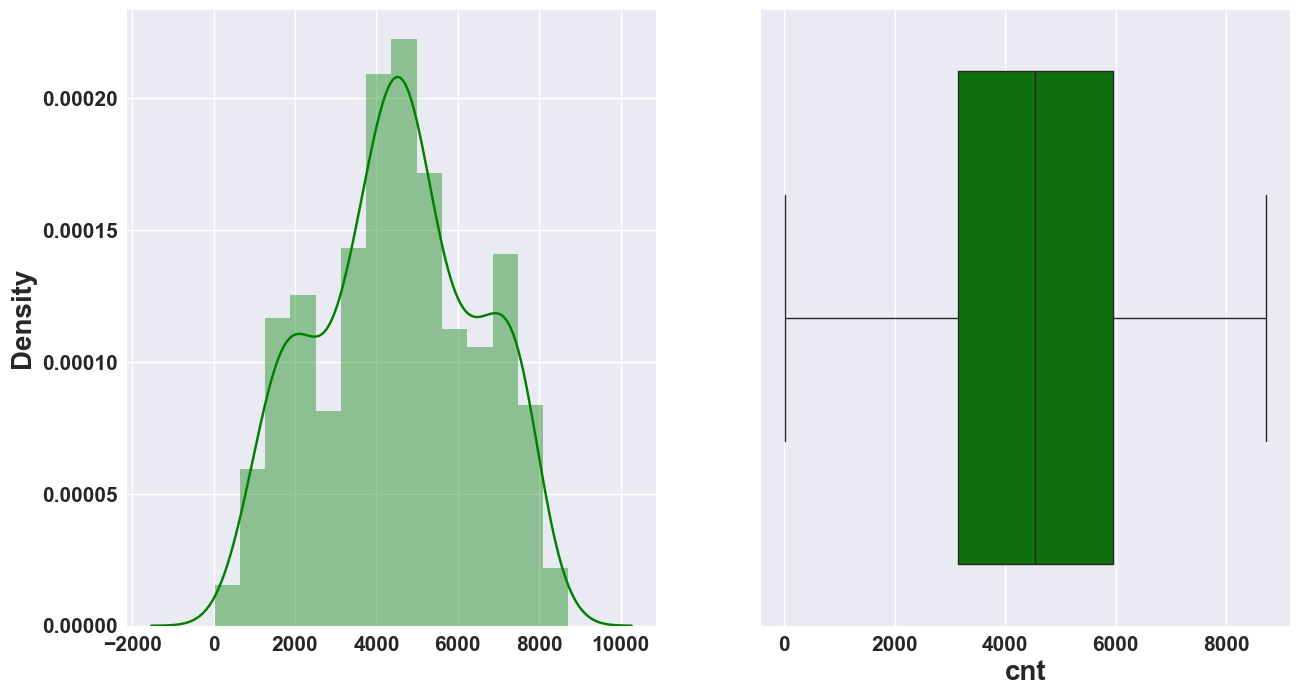

In [92]:
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= dataset['cnt'],color='g',ax=axes[0])
sns.boxplot(x = dataset['cnt'],color='g',ax=axes[1])

<Axes: xlabel='cnt'>

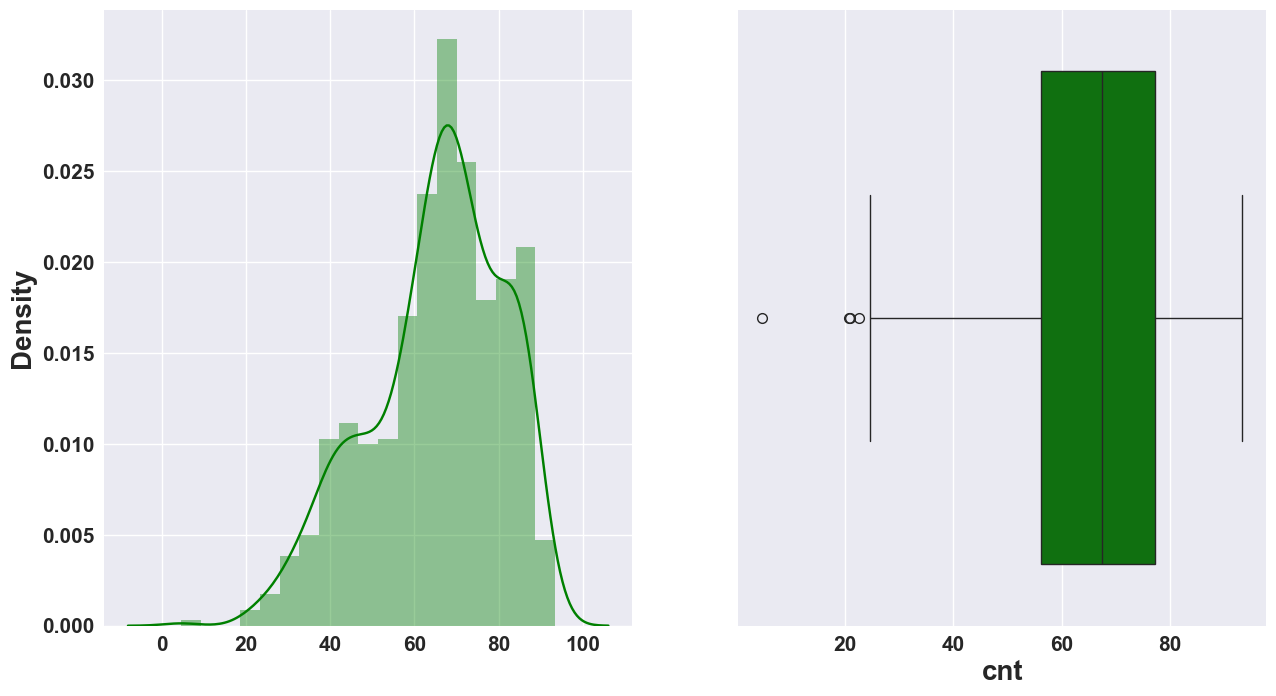

In [93]:
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= np.sqrt(dataset['cnt']),color='g',ax=axes[0])
sns.boxplot(x = np.sqrt(dataset['cnt']),color='g',ax=axes[1])

### Univariate Analysis

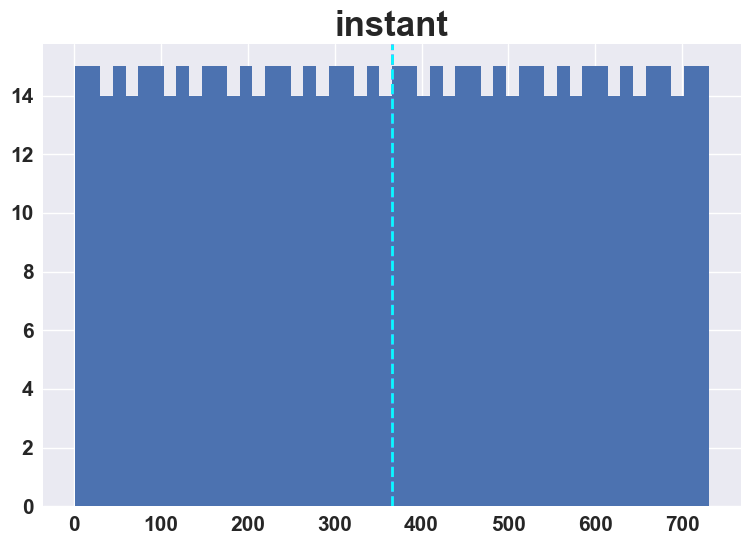

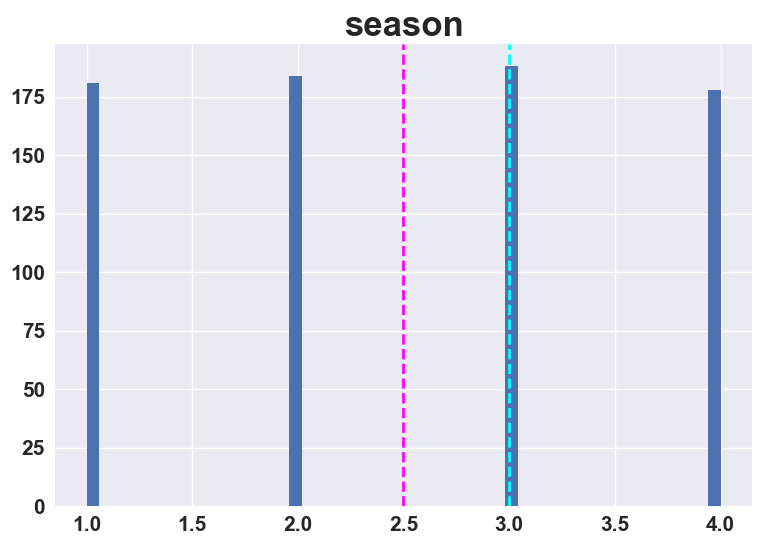

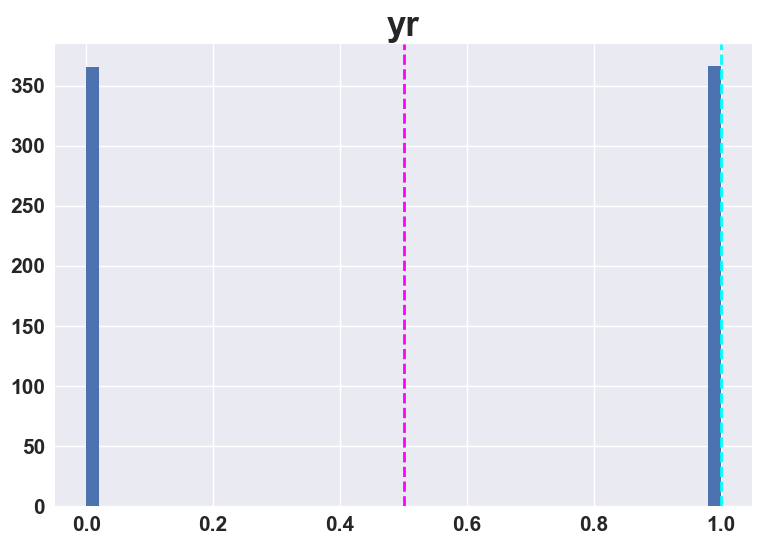

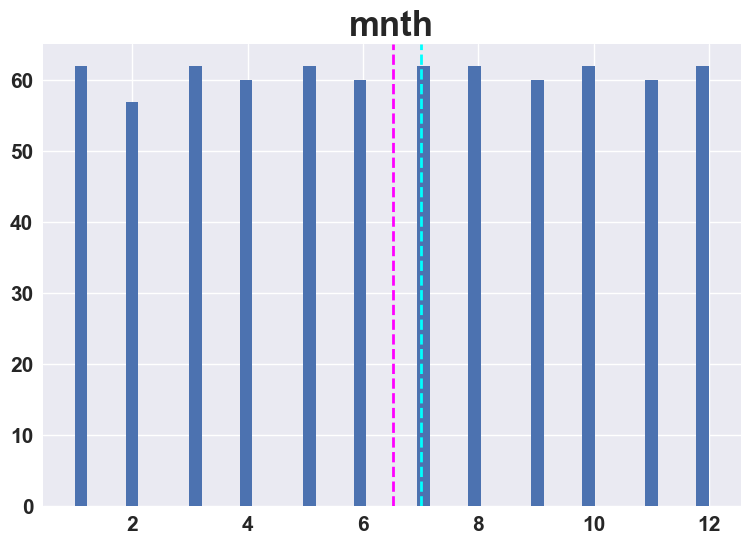

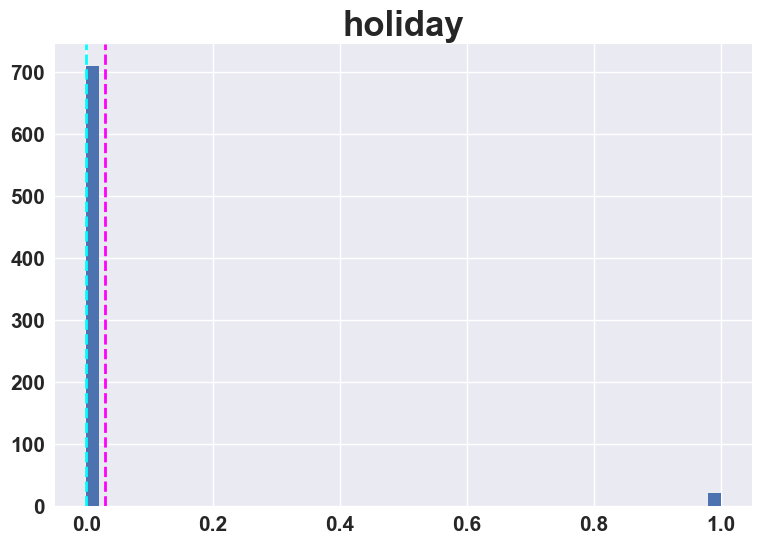

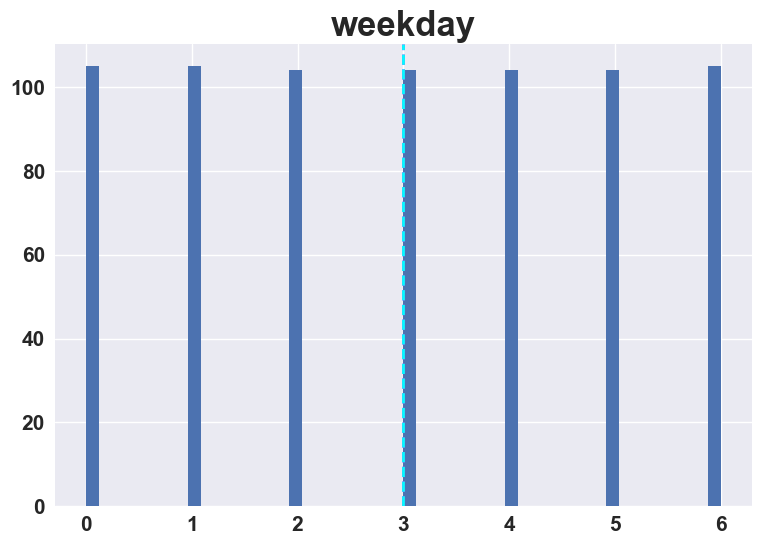

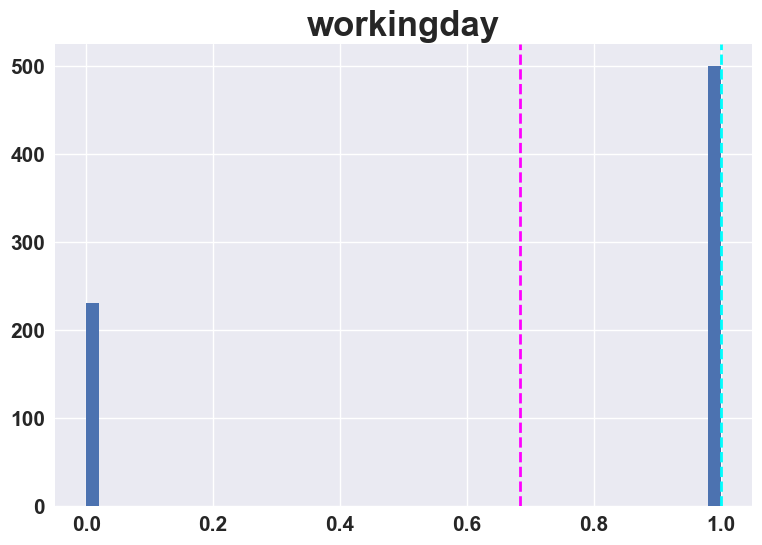

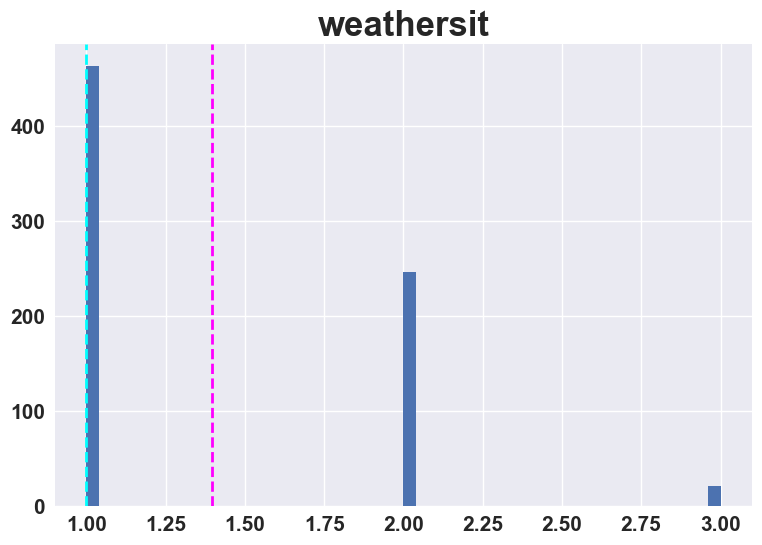

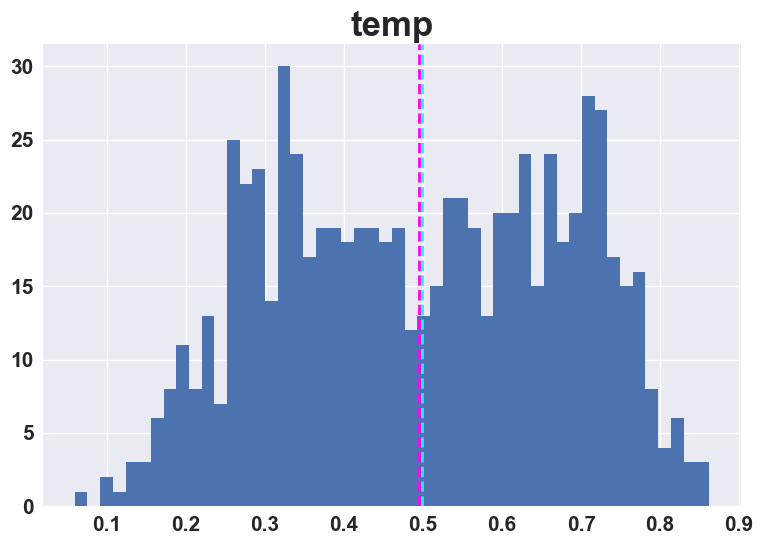

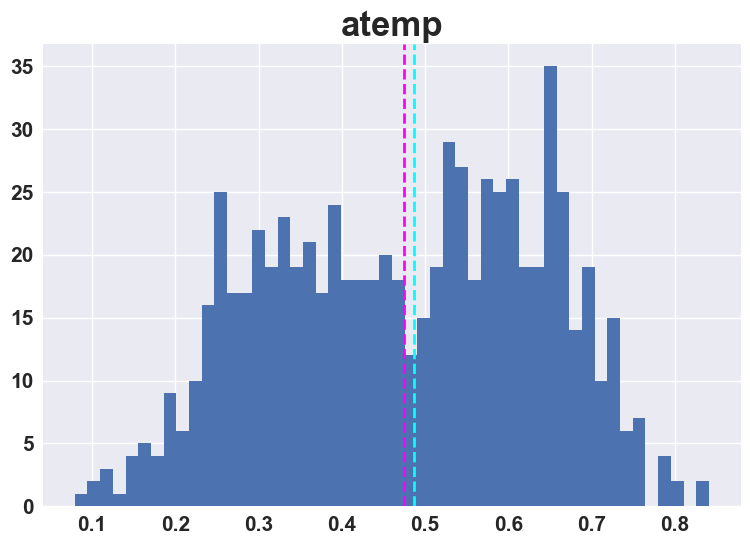

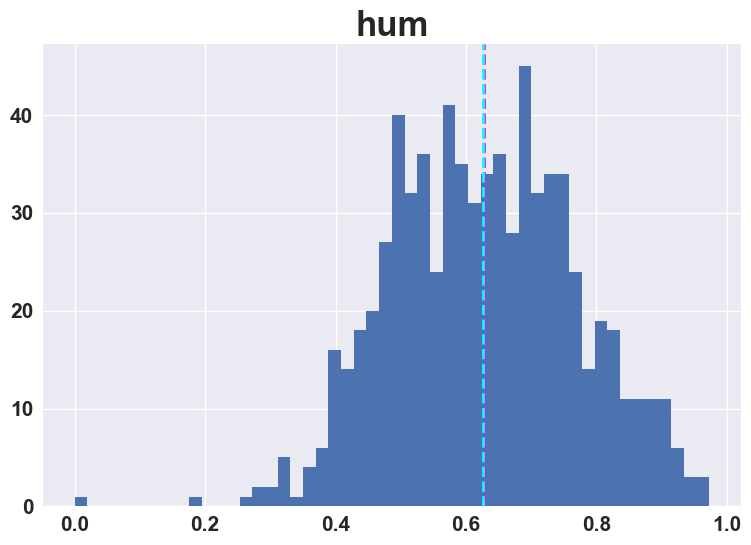

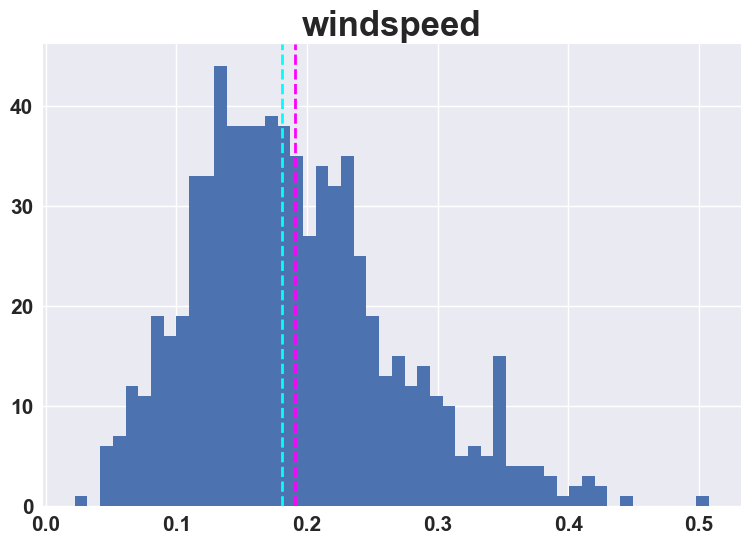

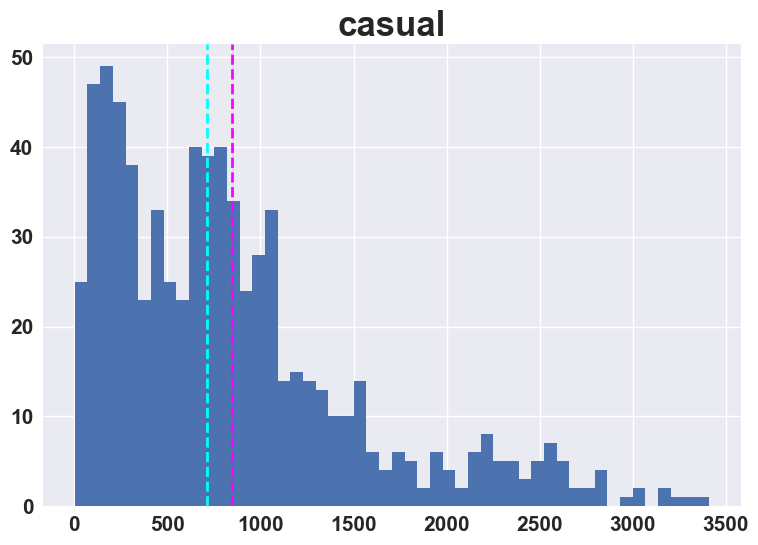

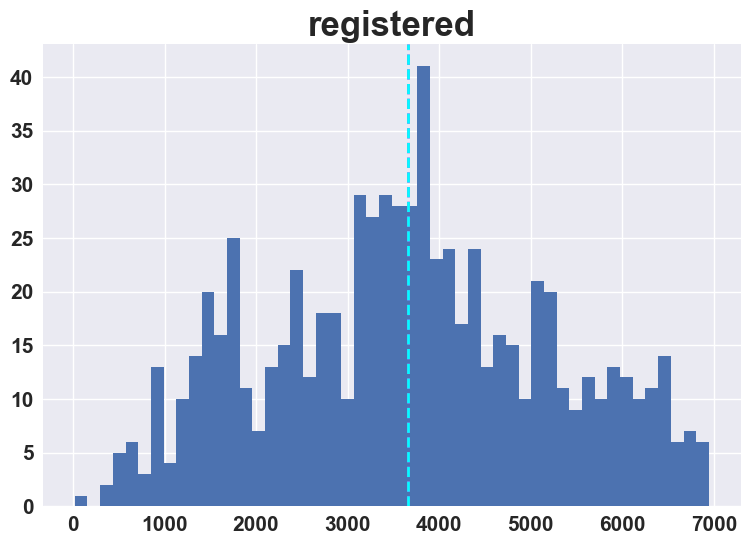

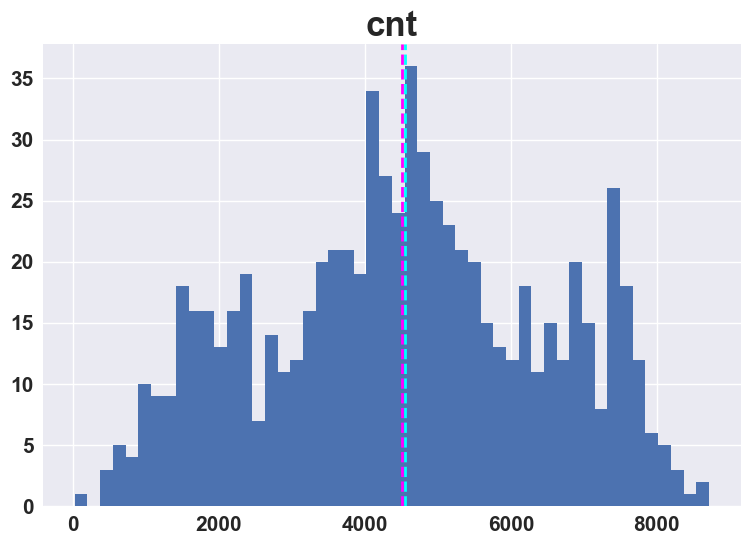

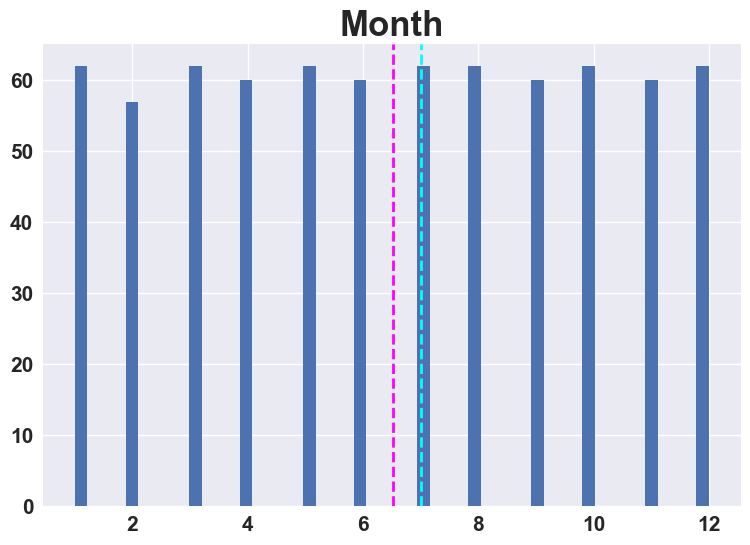

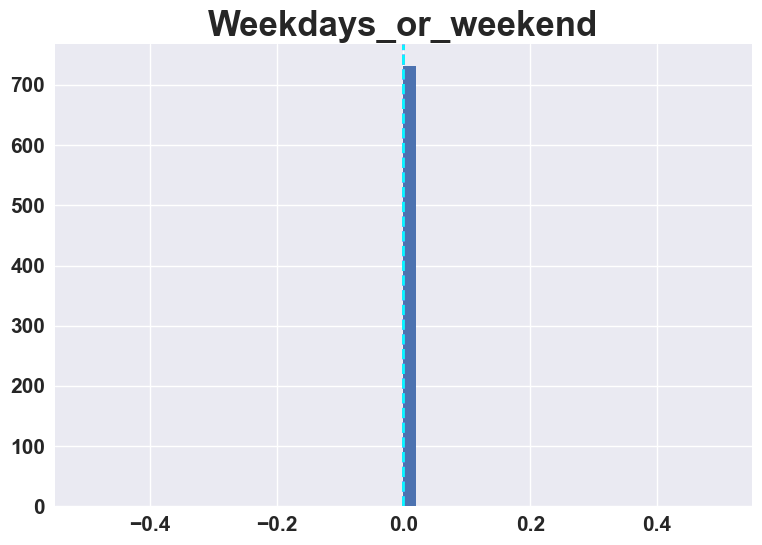

In [94]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins = 50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    plt.title(col)
plt.show()

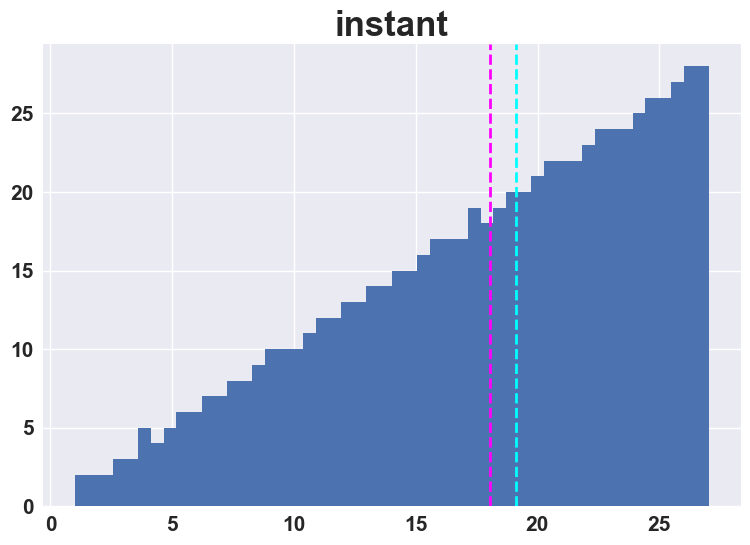

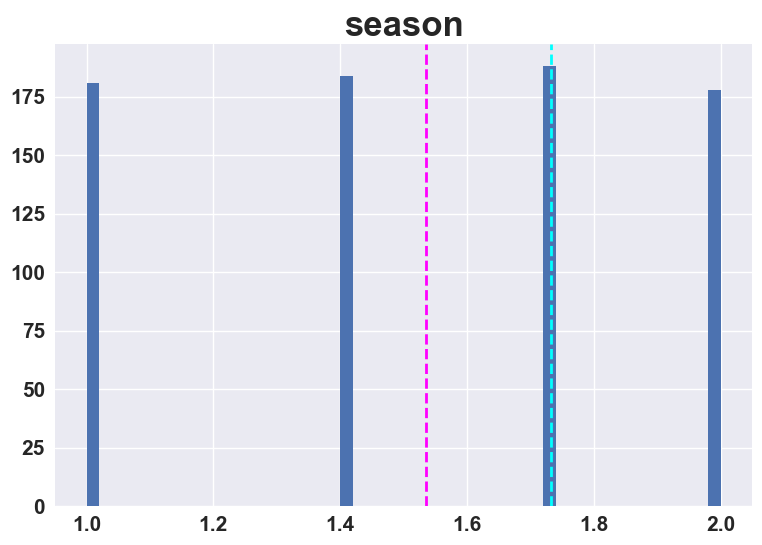

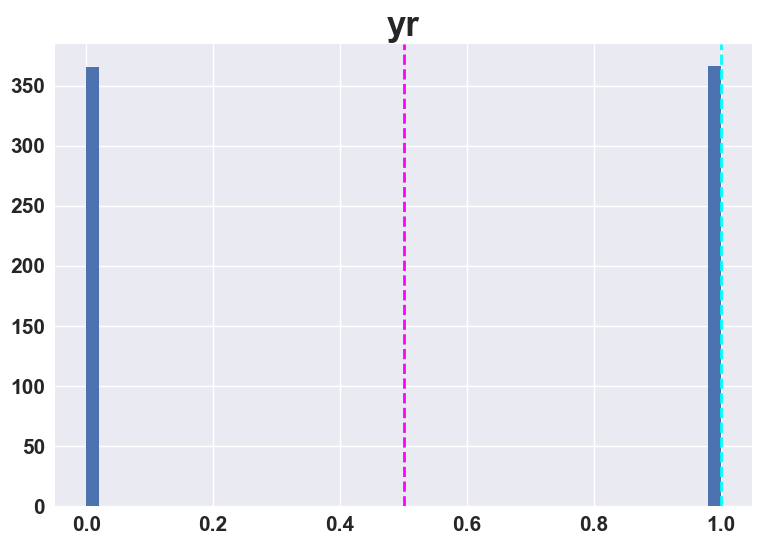

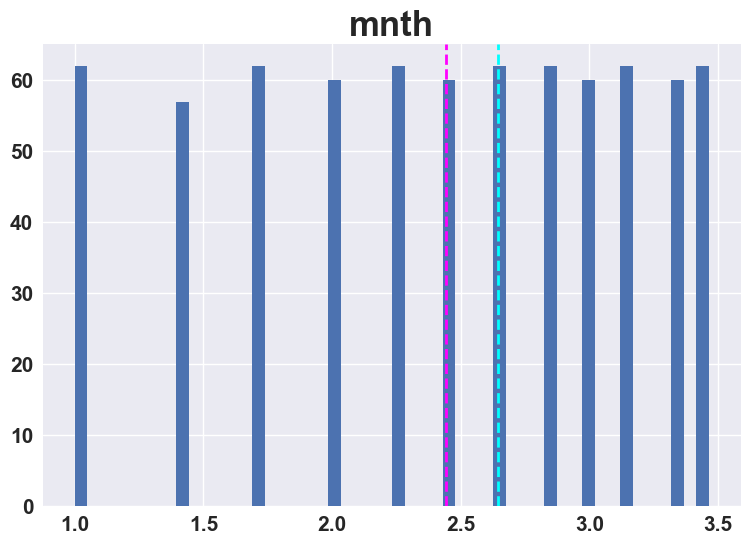

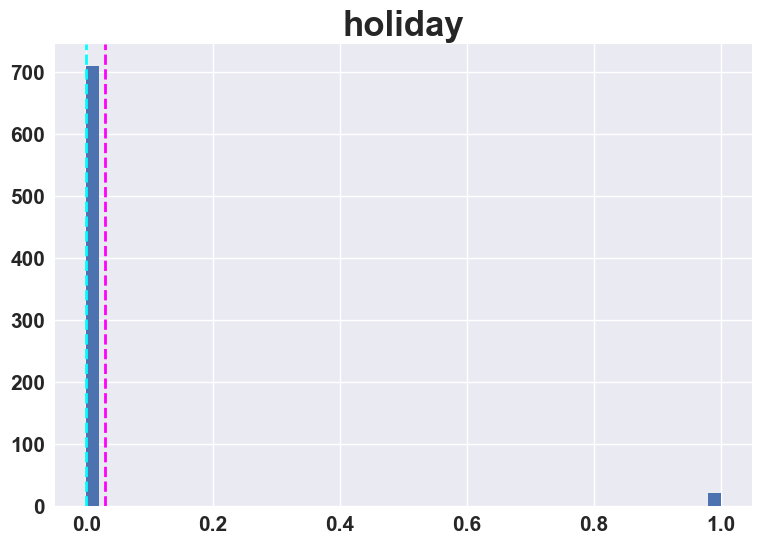

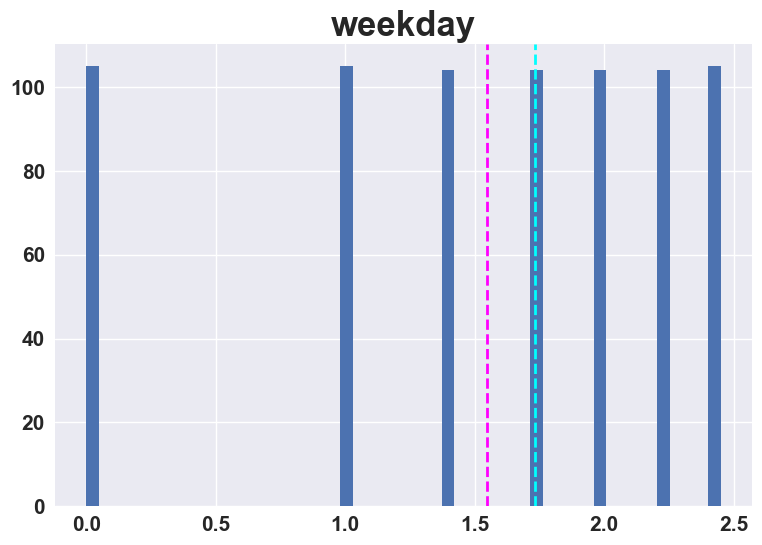

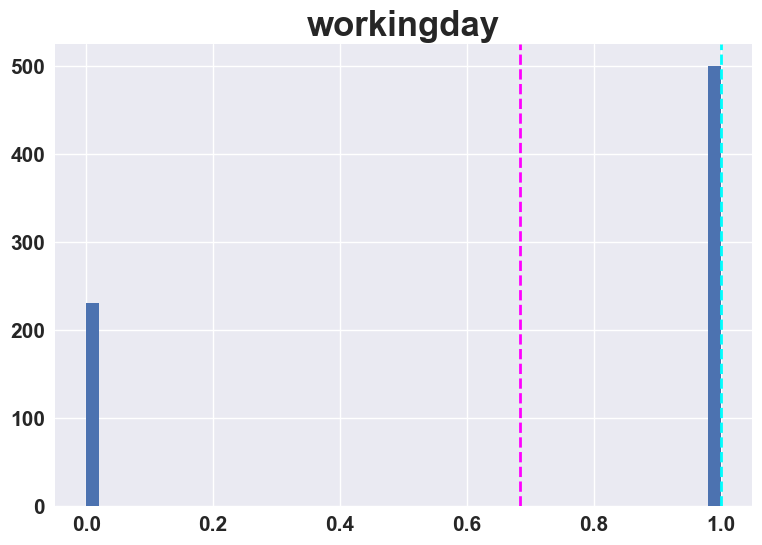

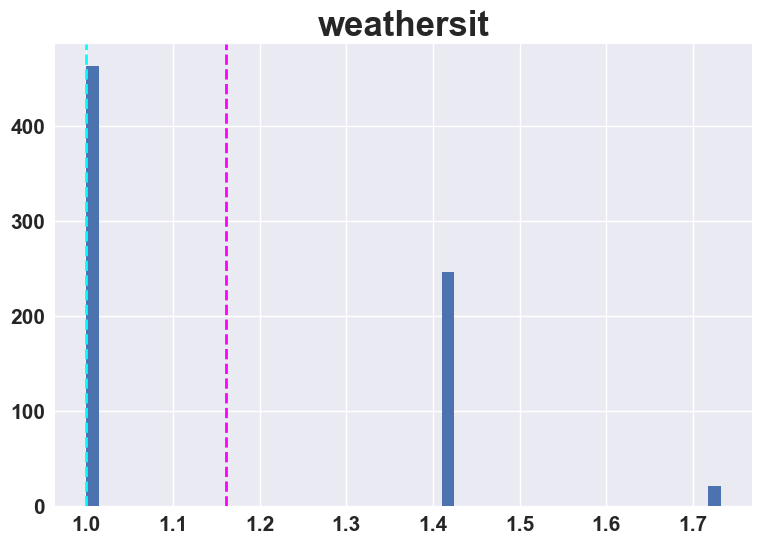

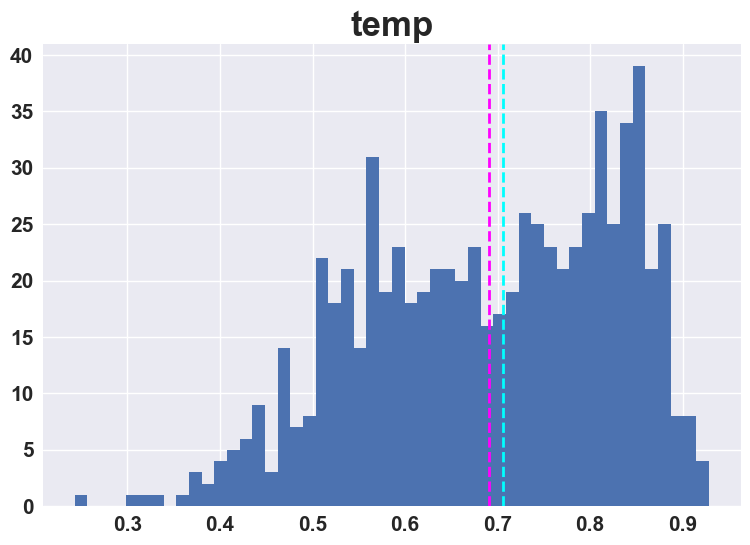

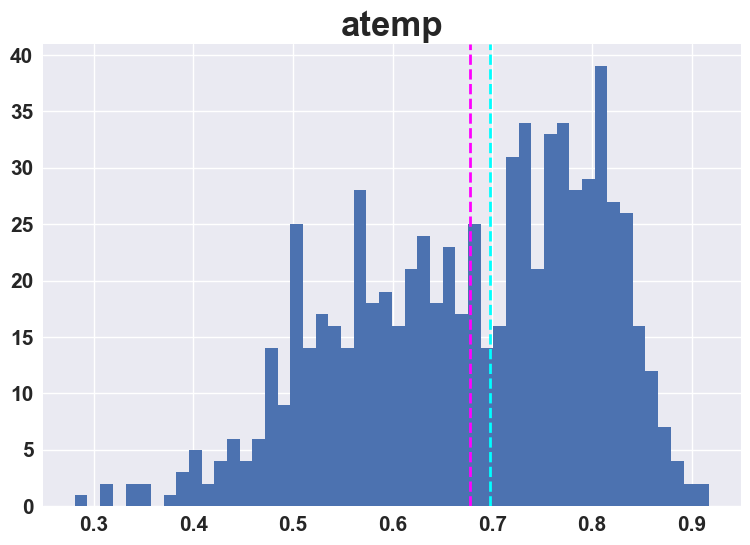

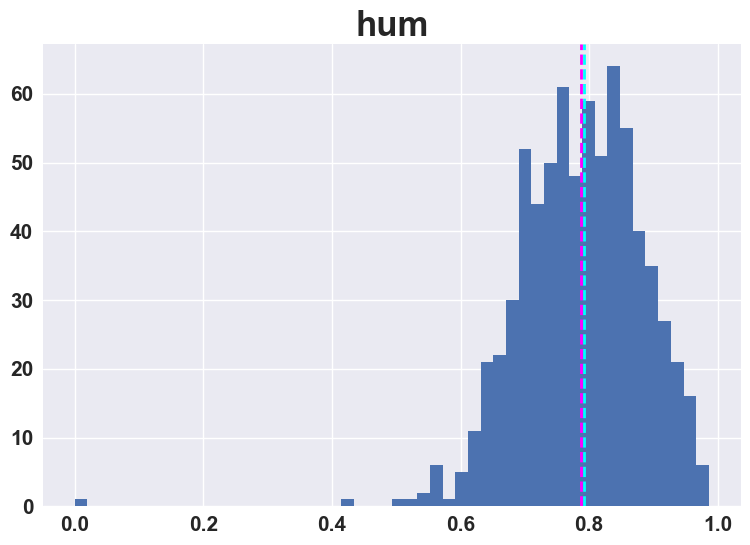

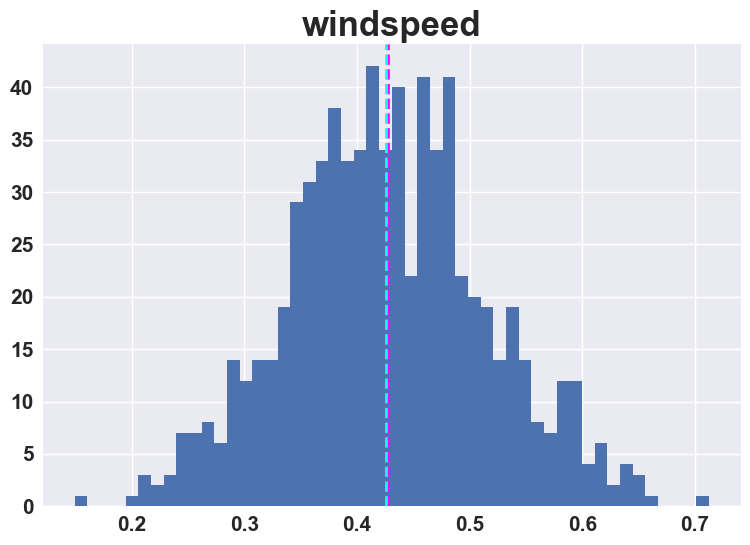

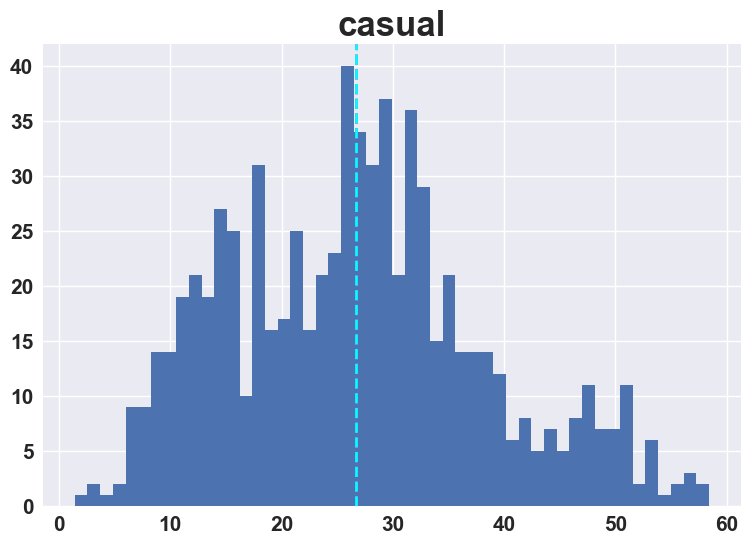

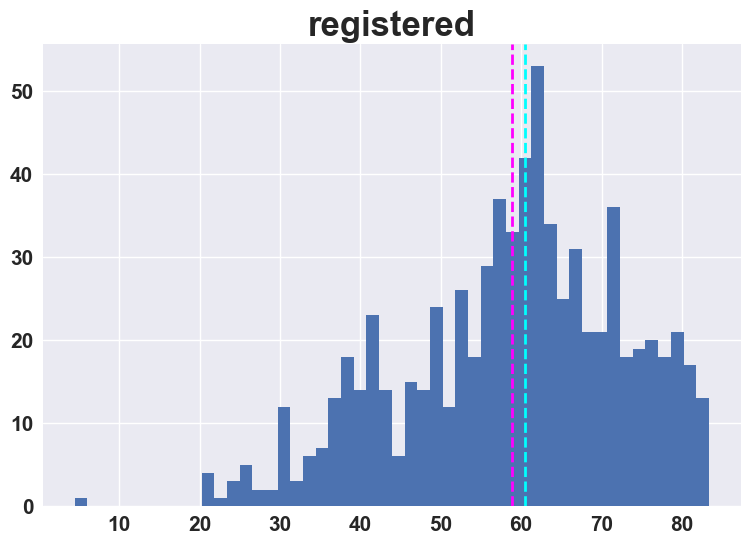

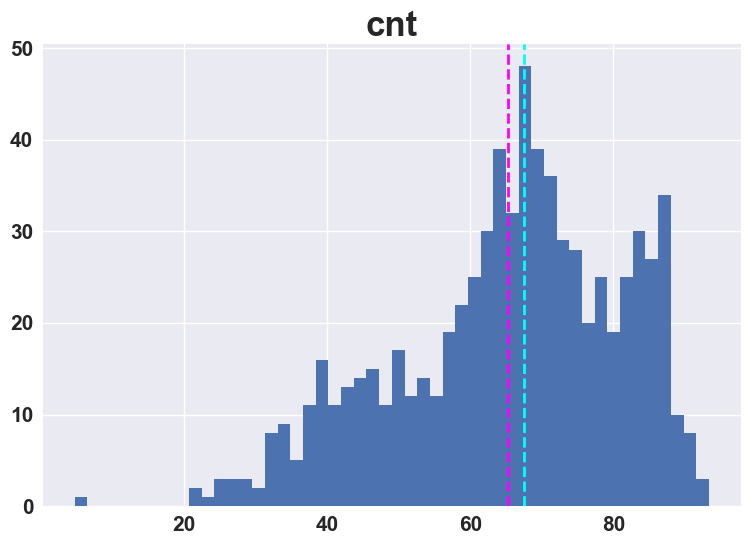

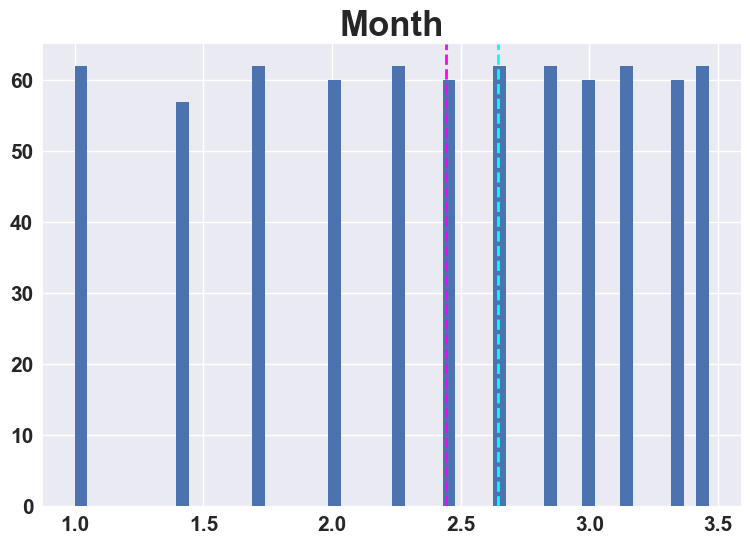

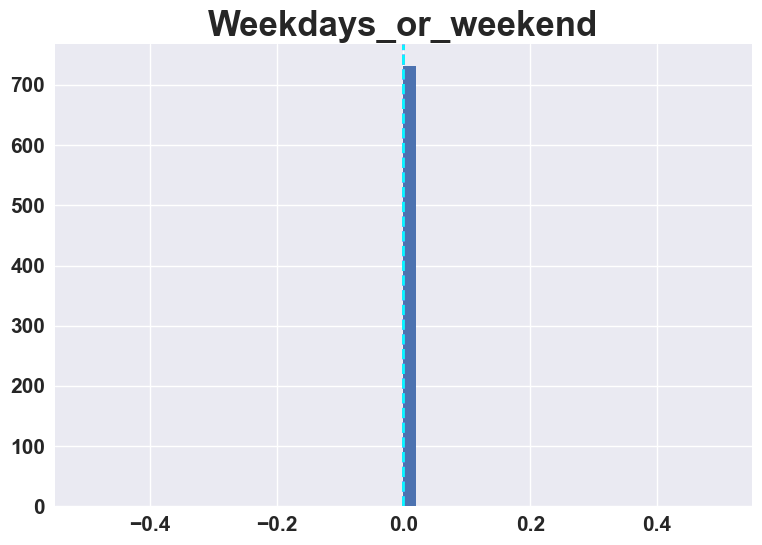

In [95]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(dataset[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

### Bivariate Analysis

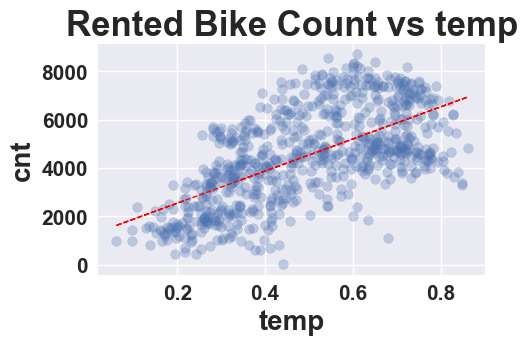

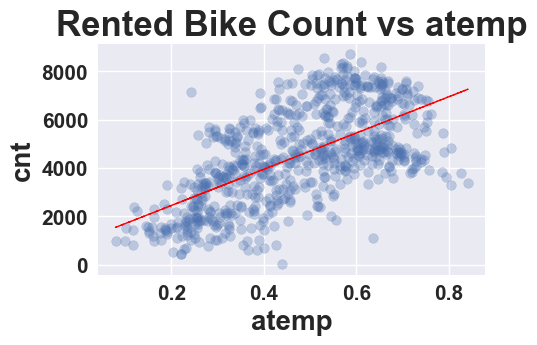

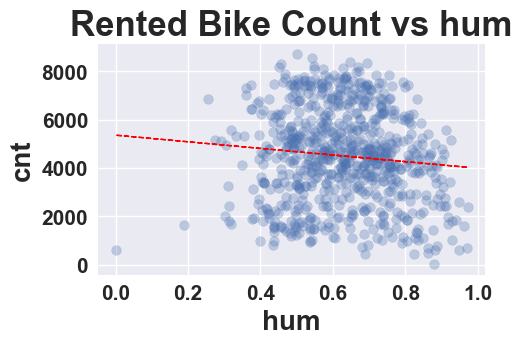

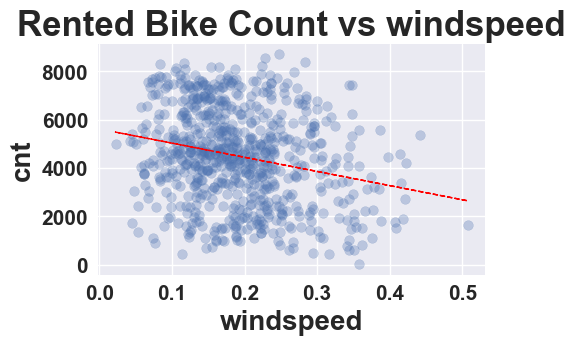

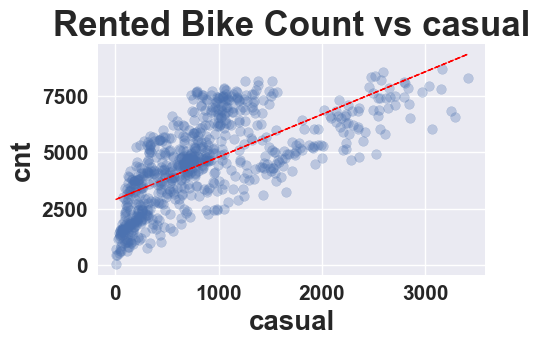

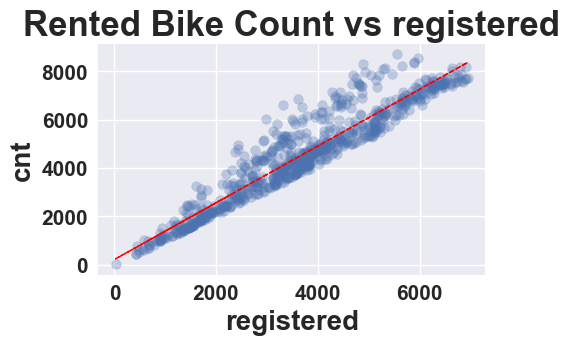

In [96]:
import numpy as np
import matplotlib.pyplot as plt

numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']

for col in numeric_cols:
    x = dataset[col]
    y = dataset['cnt']

    # Clean data
    mask = np.isfinite(x) & np.isfinite(y)
    x = x[mask]
    y = y[mask]

    if len(np.unique(x)) > 1:
        try:
            # Fit linear regression line
            z = np.polyfit(x, y, 1)
            y_hat = np.poly1d(z)(x)

            plt.figure(figsize=(5, 3))
            plt.scatter(x, y, alpha=0.3)
            plt.plot(x, y_hat, "r--", lw=1)
            plt.title(f"Rented Bike Count vs {col}")
            plt.xlabel(col)
            plt.ylabel("cnt")
            plt.show()

        except np.linalg.LinAlgError:
            print(f"Skipping {col}: LinAlgError — SVD did not converge")
    else:
        print(f"Skipping {col}: no variation in data")


<Axes: >

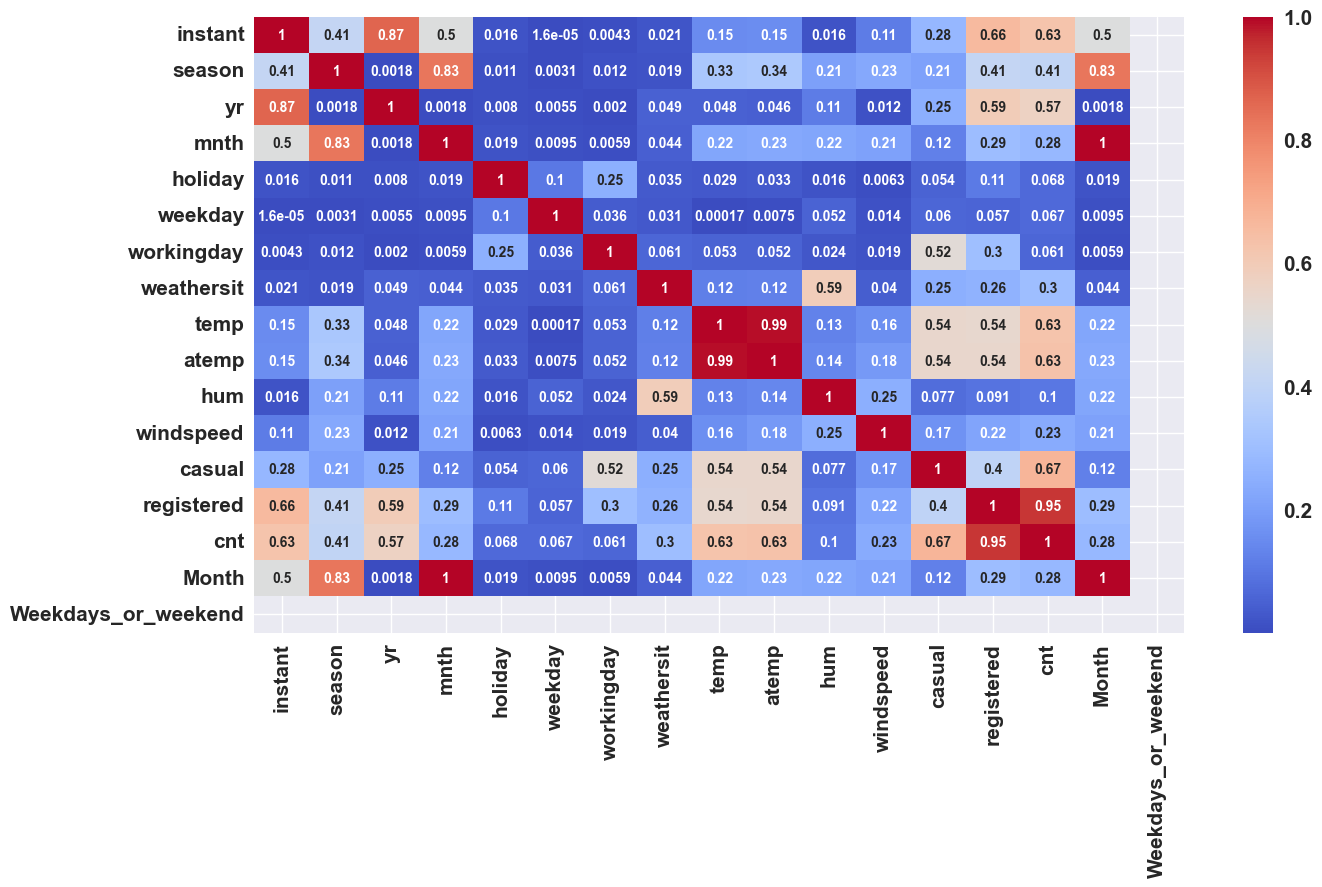

In [97]:
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [98]:
df = dataset.copy()

### Modeling

In [99]:
df.head(1)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Month,Weekdays_or_weekend
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,0


In [101]:
pip install statsmodels


  Using cached statsmodels-0.14.5-cp313-cp313-win_amd64.whl.metadata (9.8 kB)
  Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached patsy-1.0.2-py2.py3-none-any.whl.metadata (3.6 kB)
Using cached statsmodels-0.14.5-cp313-cp313-win_amd64.whl (9.6 MB)
Using cached patsy-1.0.2-py2.py3-none-any.whl (233 kB)
Using cached scipy-1.16.3-cp313-cp313-win_amd64.whl (38.5 MB)

   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   -------------------------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):
    '''
    Calculating VIF
    '''
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [103]:
Calculate_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,instant,2206.726158
1,season,24.811676
2,yr,843.438636
3,mnth,inf
4,holiday,1.109992
5,weekday,3.266765
6,workingday,9.455066
7,weathersit,14.605775
8,temp,500.481280
9,atemp,579.043435


In [106]:
df['season'].value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [110]:
# Create dummy variables for the catgeorical variable Season
df['Spring'] = np.where(df['season'] == 'Spring', 1, 0)
df['Summer'] = np.where(df['season'] == 'Summer', 1, 0)
df['Autumn'] = np.where(df['season'] == 'Autumn', 1, 0)
df['Winter'] = np.where(df['season'] == 'Winter', 1, 0)

In [112]:
df.drop(columns=['season'],axis=1,inplace=True)

In [114]:
df['holiday'].value_counts()

holiday
0    710
1     21
Name: count, dtype: int64

In [115]:
df['holiday'] = df['holiday'].map({'No Holiday':0, 'Holiday':1})

In [116]:
df['workingday'].value_counts()

workingday
1    500
0    231
Name: count, dtype: int64

In [118]:
df['workingday'] = df['workingday'].map({'Yes':1, 'No':0})

In [119]:
df.head()

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Month,Weekdays_or_weekend,Spring,Summer,Autumn,Winter
0,1,0,1,NaN,6,NaN,2,0.344167,0.363625,0.805833,0.160446,331,654,985,1,0,0,0,0,0
1,2,0,1,NaN,0,NaN,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1,0,0,0,0,0
2,3,0,1,NaN,1,NaN,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1,0,0,0,0,0
3,4,0,1,NaN,2,NaN,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1,0,0,0,0,0
4,5,0,1,NaN,3,NaN,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1,0,0,0,0,0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   instant              731 non-null    int64  
 1   yr                   731 non-null    int64  
 2   mnth                 731 non-null    int64  
 3   holiday              0 non-null      float64
 4   weekday              731 non-null    int64  
 5   workingday           0 non-null      float64
 6   weathersit           731 non-null    int64  
 7   temp                 731 non-null    float64
 8   atemp                731 non-null    float64
 9   hum                  731 non-null    float64
 10  windspeed            731 non-null    float64
 11  casual               731 non-null    int64  
 12  registered           731 non-null    int64  
 13  cnt                  731 non-null    int64  
 14  Month                731 non-null    int32  
 15  Weekdays_or_weekend  731 non-null    int

### Linear Regression

In [124]:
# lets import train test split for splitting the data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [125]:
# Creating a dependent variable for rented bike count
dependent_variable = 'Rented Bike Count'

In [126]:
# Create a list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})
independent_variables

['weekday',
 'windspeed',
 'cnt',
 'atemp',
 'Spring',
 'Weekdays_or_weekend',
 'mnth',
 'hum',
 'workingday',
 'registered',
 'casual',
 'yr',
 'Autumn',
 'temp',
 'holiday',
 'Month',
 'Summer',
 'weathersit',
 'Winter',
 'instant']

In [128]:
# Create the dependent variable data
y = np.sqrt(df['cnt'])

# Create the data of independent variables
X = df.drop('cnt',axis=1)

In [129]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [130]:
X_train[0:10]

,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,Month,Weekdays_or_weekend,Spring,Summer,Autumn,Winter
97,98,0,4,NaN,5,NaN,2,0.335833,0.324479,0.836250,0.226992,172,1299,4,0,0,0,0,0
503,504,1,5,NaN,5,NaN,1,0.564167,0.551121,0.523333,0.136817,1521,6118,5,0,0,0,0,0
642,643,1,10,NaN,4,NaN,2,0.657500,0.607975,0.722917,0.117546,891,6437,10,0,0,0,0,0
498,499,1,5,NaN,0,NaN,1,0.612500,0.585238,0.576250,0.225117,2172,3946,5,0,0,0,0,0
303,304,0,10,NaN,1,NaN,1,0.340000,0.356063,0.703333,0.106350,362,3307,10,0,0,0,0,0
570,571,1,7,NaN,2,NaN,1,0.750833,0.706450,0.655000,0.211454,1140,6452,7,0,0,0,0,0
250,251,0,9,NaN,4,NaN,3,0.633913,0.555361,0.939565,0.192748,153,1689,9,0,0,0,0,0
17,18,0,1,NaN,2,NaN,2,0.216667,0.232333,0.861667,0.146775,9,674,1,0,0,0,0,0
595,596,1,8,NaN,6,NaN,1,0.678333,0.618071,0.603333,0.177867,2827,5038,8,0,0,0,0,0
240,241,0,8,NaN,1,NaN,1,0.636667,0.607958,0.554583,0.159825,729,3905,8,0,0,0,0,0


In [131]:
# Transforming data 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [132]:
# Checking shape
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(584, 19)
(584,)
(147, 19)
(147,)


In [133]:
X_train[0:10]

array([[0.13287671, 0.        , 0.27272727,        nan, 0.83333333,
               nan, 0.5       , 0.35024023, 0.32839414, 0.80442593,
        0.48605788, 0.05181347, 0.18466647, 0.27272727, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.6890411 , 1.        , 0.36363636,        nan, 0.83333333,
               nan, 0.        , 0.63925722, 0.63167472, 0.35526299,
        0.24873701, 0.46296861, 0.88045048, 0.36363636, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.87945205, 1.        , 0.81818182,        nan, 0.66666667,
               nan, 0.5       , 0.75739478, 0.70775379, 0.64174706,
        0.19801995, 0.27095398, 0.92650881, 0.81818182, 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.68219178, 1.        , 0.36363636,        nan, 0.        ,
               nan, 0.        , 0.7004354 , 0.67732832, 0.43122037,
        0.48112329, 0.66138372, 0.56684955, 0.36363636, 0.        ,
        0.   

In [139]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [138]:
# Import required modules
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Split data
X = dataset.drop('cnt', axis=1)   # Features
y = dataset['cnt']                # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),   # Replace NaNs with column means
    ('scaler', StandardScaler()),                  # Normalize features
    ('regressor', LinearRegression())              # Fit linear regression
])

# Fit the model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 1.0
MAE: 9.961132447989215e-13
RMSE: 1.3228838074654798e-12


In [140]:
# Cheeck coefficents
regressor.coef_

array([-4.09636747e-15,  9.92539384e-14,  1.15196589e-12,  1.69864123e-14,
        2.26270927e-13, -1.77859436e-14, -5.79950601e-14, -2.36058386e-13,
       -6.73810834e-13,  6.78609319e-13,  5.31656208e-13,  7.57545424e-13,
        1.00000000e+00,  1.00000000e+00,  1.69727513e-14,  0.00000000e+00])

In [141]:
pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])

,Coefficient
instant,-4.096367e-15
season,9.925394e-14
yr,1.151966e-12
mnth,1.698641e-14
holiday,2.262709e-13
weekday,-1.778594e-14
workingday,-5.799506e-14
weathersit,-2.360584e-13
temp,-6.738108e-13
atemp,6.786093e-13


In [142]:
# Check intercept
regressor.intercept_

np.float64(2.7284841053187847e-12)

In [143]:
# Checking score
regressor.score(X_train,y_train)

1.0

In [145]:
# Y peredictions on train data
y_pred_train = regressor.predict(X_train)

# y predictions on test data
y_pred = regressor.predict(X_test)

In [146]:
# Evaluation of test data set

#Calculate Mean Absolute Error.
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 1.0634697959745472e-12.
The Mean Squred Error(MSE) is 1.533028106995822e-24.
The Root Mean Squared Error(RMSE) is 1.2381551223476895e-12.
The R2 Score is 1.0.
Adjusted R2 is 1.0.


In [147]:
#Saving train data set results in dataframe.
test_dict = {'Model':"Linear Regression",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [148]:
# create test_result dataframe
test_results_df = pd.DataFrame(test_dict,index=[0])
test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Linear Regression,0.0,0.0,0.0,1.0,1.0


In [149]:
# define a fucntion to plot predicted y values and actual y values
def plot_Pred_vs_actual(y_pred_test,y_test):
  ''' 
  Visualize predicted values with actual values.
  '''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred_test)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [150]:
# define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred_test,y_test):
  '''
  Plot scatter plot for y_test values and y_test values. To check how close we are to regresson line
  '''
  plt.figure(figsize=(16,5))
  sns.regplot(x = y_test,y = y_pred_test, line_kws={'color':'red'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [151]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed).
def Residual_distPlot(y_pred_test,y_test):  
  '''
  Checks the distribution of residals
  '''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x = y_test-y_pred_test)
  plt.title("Residual Distribution")

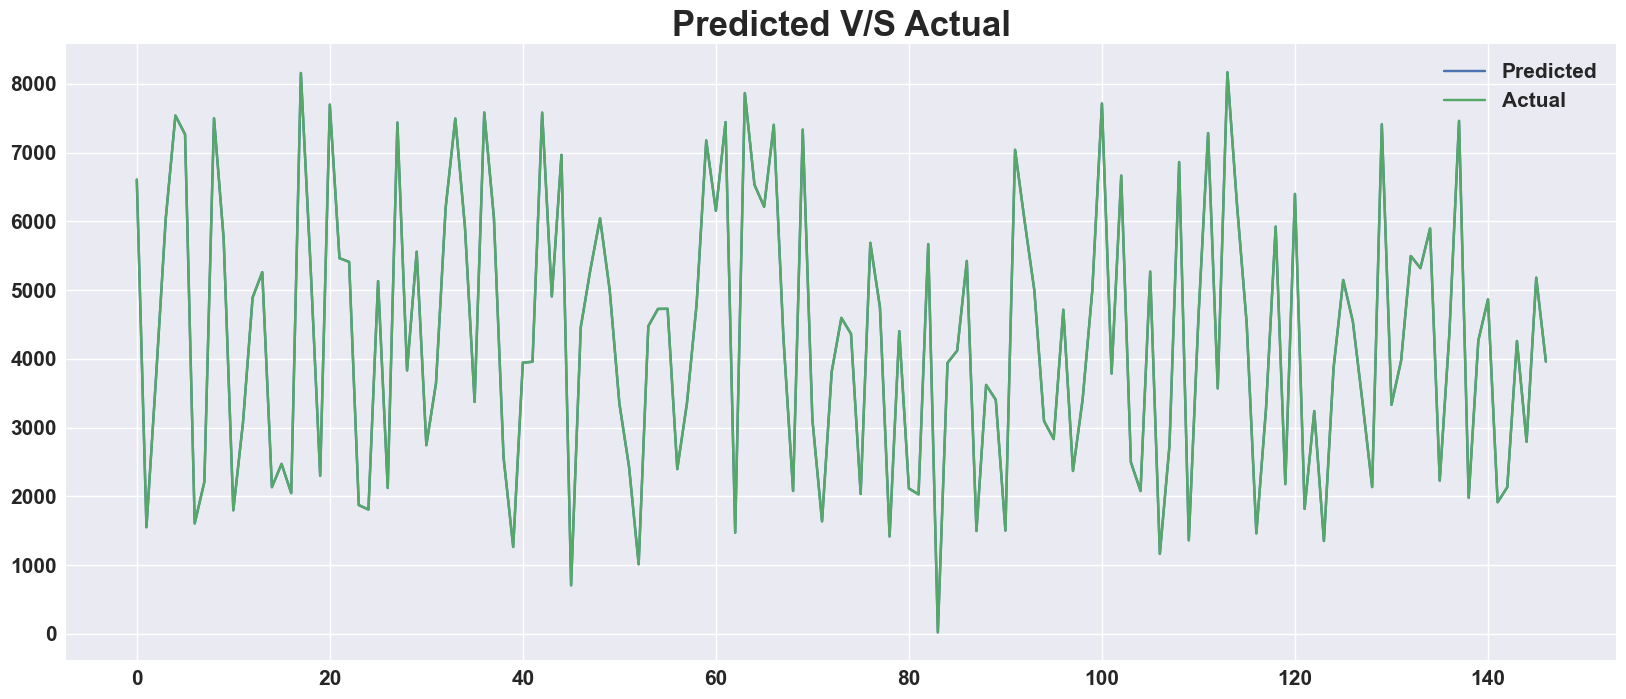

In [152]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

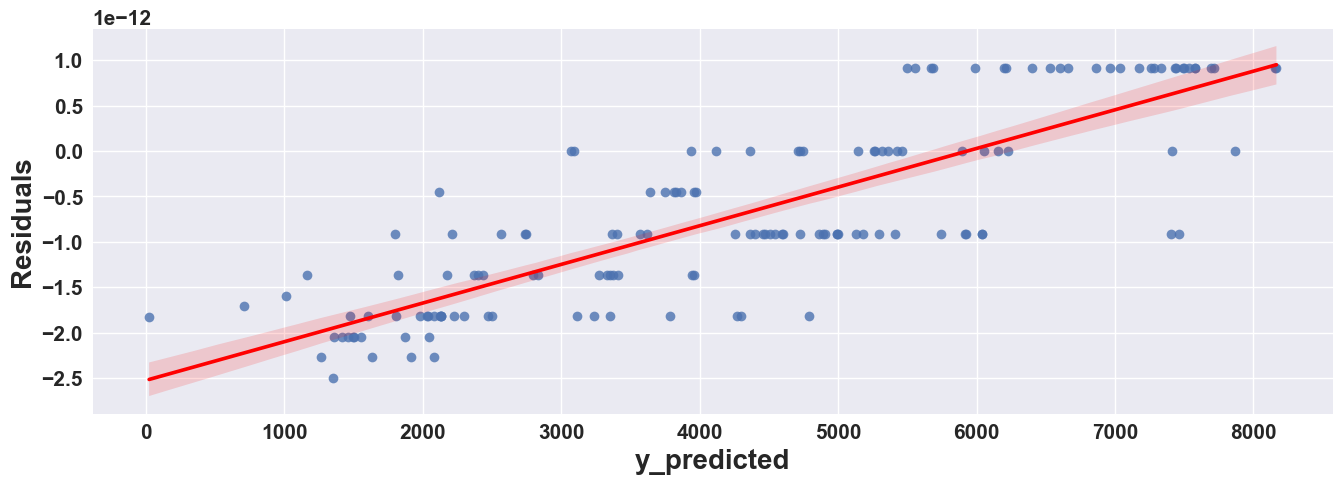

In [153]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x = y_pred, y = y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

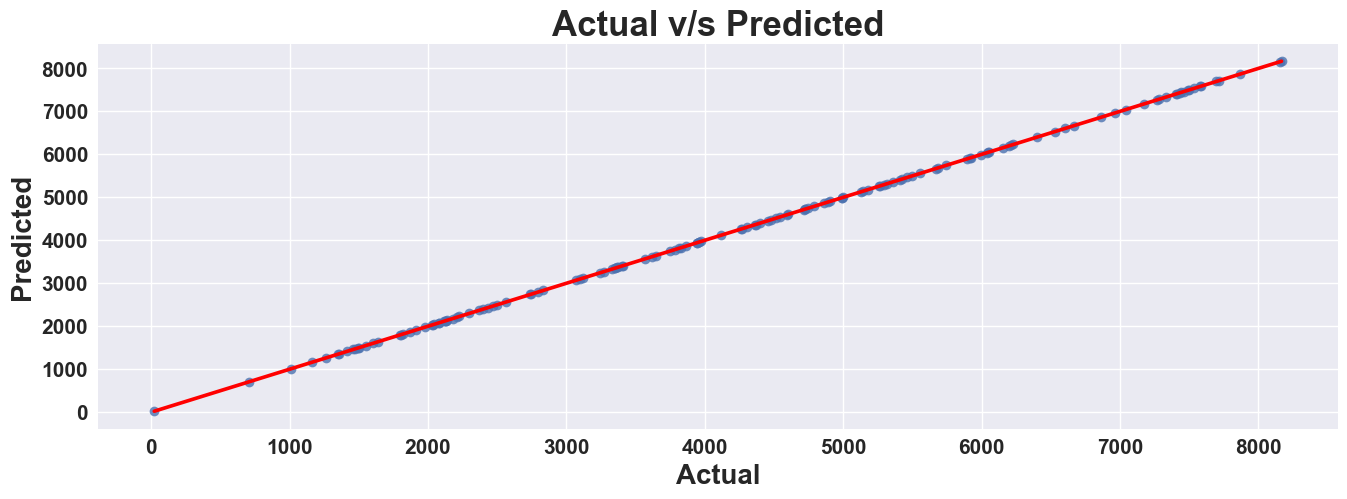

In [154]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

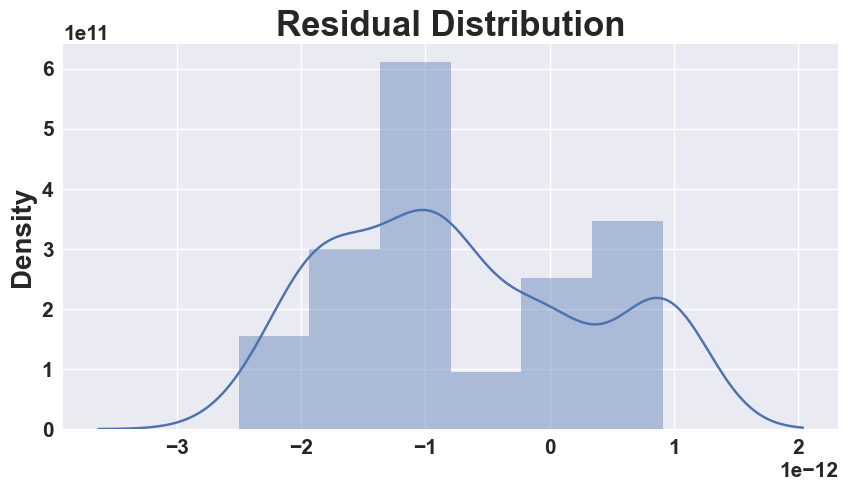

In [155]:
Residual_distPlot(y_pred,y_test)

## Hello